# Homework 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)

$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

***

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.

<span style='color:rgba(180,55,10); font-weight:bold'>Answer:</span> 

There are many reasons why this is infeasible:
- Sample size to asset number ratio to estimate covariance matrix: usually a typical size-to-asset ratio is between 3 and 5, which means that, for 1000 assets, we would need 3000 to 5000 historical observations to calculate a stable and usable covariance matrix. That means that we would need at least 12 years of daily price returns to calculate a single covariance matrix, which is infeasible, as most of those assets would not have such a historical price series and more reliable estimates of the covariance matrix such as GARCH, would not make much sense to use. 
- Otimization performance: working with a 1000 x 1000 covariance matrix would demand significant computing time and memory, causing it to be inefficient 
- Hard to predict returns accurately: it is already hard to predict returns for a small number of securities accurately to be used in MV optimization (which presents high sensitivity to returns estimations). Doing it on a scale of 1000 securities would be even more difficult, especially if one uses techniques such as Black-Litterman to incorporate experts' views on each assets' returns on top of the neutral estimation.

*Professor explanation:*
1. Statistically (problem): precision in the covariance elements -> if you have 5000 x 5000 covariance matrix, we have million of entries. If we have a time series of 15 years of monthly data, we have almost 200 datapoints in our time series, which is not enough to estimate millions of datapoints in the covariance matrix. Thus, if we are building confidence intervals for each entry, these confidence intervals would be really wide.
2. Statistically (significant problem): I have an estimate of covariance matrix and an "some" estimate of returns, which end up being imprecise (very low confidence interval). The mean returns are very poorly estimated (there is a lot of error in the vector mu). There are some error in the covariance matrix, but even if we assume we could estimate it perfectly, because the covariance matrix is nearly singular, when you inverted, it becomes a large scaling factor. So, when you invert it and multiply by the vector of returns, it will scale hugely, scaling the error in the mu vector by a factor of 10 or 100. You got a noisy input, and an even more noisy outcome (weights). The MV optimization is blowing up return errors
3. Mathematically (less significant problem): there will probably be assets highly correlated, so we run into multicollinearity, making the matrix barely invertible, which might result in floating number round off affecting the result.


### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

<span style='color:rgba(180,55,10); font-weight:bold'>Answer:</span> 

- Assets within an asset class should be relatively homogeneous (must have similar attributes)
- Asset classes should be mutually exclusive
- Asset classes should be diversifying: an asset class should not have extremely high expected correlations with other asset classes or with a linear combination of other asset classes.
- The asset classs as a group should make up a preponderance of world investable wealth.
- Asset classes selected for investment should have the capacity to absorb a meaningful proportion of a investor's portfolio (consideration for liquidity and transaction costs)

*Source: CFA Level III, Volume I, pg. 250*

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

<span style='color:rgba(180,55,10); font-weight:bold'>Answer:</span> 

TIPS should form a new asset class. 
- They are diversifying (low correlation with other asset classes)
- They don't overlap with any of the other 11 asset classes
- They have capacity to absorb a meaningful proportion of the HMC portfolio: initial offering size 3 years before the proposed change was $7 bn, while the 7% allocation proposed in the Investment Policy would correspond to $1.3 bn of the $19 bn AUM of HMC (~19% of the total initial volume). Assuming that 3 years later, new issuings have been made, increasing the volume and liquidity of TIPS, it is safe to assume the asset class capacity to absorb investments from HMC.

*Professor:*
- By having each portfolio manager optimizing their portfolio of a specific asset class, the combination of all those optimized portfolios mght not be the global optimal portfolio. You want the covariance matrix for the asset classes to be almost block diagonal, you don't want correlation between asset classes. But when you have assets in an asset class correlated (not close to zero) to assets in another asset class, then you will not optimize the global portfolio by optimizing the combination of each optimized asset class portfolios. Even if the assets are mutually exclusive, you could have one manager going long in an asset (mining stock) that has a high correlation to an asset within other asset class (iron ore) that the other manager went short.
- To know if you should have a separate asset class, look for correlations.


### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

<span style='color:rgba(180,55,10); font-weight:bold'>Answer:</span> 

- HMC's clients includes mostly endowment funds, which serve as funding sources for a variety of goals. Therefore, a part of the earnings from investments is expected to be spent each year. Since the expenses are subject to inflation, it makes sense for HMC to aim a certain return on investments above the inflation rate to make sure it continues to grow the funds' wealth over time. 

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6?

<span style='color:rgba(180,55,10); font-weight:bold'>Answer:</span> 

- For Exhibits 5, 
$$\min_{\mathbf{w}} \quad \mathbf{w}' \Sigma \mathbf{w}$$

$$\text{subjected to:}$$
$$\mathbf{w}' \mathbf{\tilde{\mu}} = \tilde{\mu}^p$$
$$\mathbf{0} \leq \mathbf{w} \leq \mathbf{1}$$
$$0 \leq \mathbf{1}' \mathbf{w} \leq 1.5$$


$${\text{where }} \mathbf{\tilde{\mu}} = \mathbf{\mu} - \mathbf{1}\mathbf{r}^{\text{infl}} - \mathbf{1}\mathbf{r}^{\text{infl}}$$ 

- For Exhibits 6:
$$\min_{\mathbf{w}} \quad \mathbf{w}' \Sigma \mathbf{w}$$

$$\text{subjected to:}$$
$$\mathbf{w}' \mathbf{\tilde{\mu}} = \tilde{\mu}^p$$
$$
\begin{pmatrix}
0.90 w_1^{\text{current}} \\
0.90 w_2^{\text{current}} \\
\vdots \\
0.90 w_{n-1}^{\text{current}} \\
0
\end{pmatrix}
\leq 
\mathbf{w}
\leq
\begin{pmatrix}
1.10 w_1^{\text{current}} \\
1.10 w_2^{\text{current}} \\
\vdots \\
1.10 w_{n-1}^{\text{current}} \\
1
\end{pmatrix}
$$

$$0 \leq \mathbf{1}' \mathbf{w} \leq 1.5$$


$${\text{where }} \mathbf{\tilde{\mu}} = \mathbf{\mu} - \mathbf{1}\mathbf{r}^{\text{infl}} - \mathbf{1}\mathbf{r}^{\text{infl}}$$ 


### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

<span style='color:rgba(180,55,10); font-weight:bold'>Answer:</span> 

- The constraint is binding because it is unlikely that in all those cases the optimum unconstrained value for allocation in domestic equities and domestic bonds would be exactly zero. Probably, the constraints are binding there and for un unconstraint portfolio those values would be negative (short positions)

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

<span style='color:rgba(180,55,10); font-weight:bold'>Answer:</span> 

- The sharpe ratio goes from 0.38 to 0.35-0.36.

***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. </i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$

## 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

## 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

## 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

***
<span style='color:rgba(180,55,10); font-weight:bold'>2.1) Summary Statistics (Answer):</span>

* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.width', 1000)

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

parent_path = os.path.dirname(os.getcwd()) # Get parent path (if using .ipynb file)
# parent_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) # Get parent path (if using .py file)
os.chdir(parent_path) # Set parent path as working directory (for reading and writing files)
sys.path.insert(0, parent_path) # Add parent path to system path (for importing modules)



In [2]:
# Import file:
INFILE = "data/multi_asset_etf_data.xlsx"

try:
    info = pd.read_excel(INFILE, sheet_name="descriptions").set_index("ticker")
    display(info)
except FileNotFoundError as e:
    print(f"Error: {e}")

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,48833086,566341992448,The Trust seeks to achieve its investment obje...
EFA,iShares MSCI EAFE ETF,ETF,USD,11332778,57923706880,The fund generally will invest at least 80% of...
EEM,iShares MSCI Emerging Index Fun,ETF,USD,23583292,17685696512,The fund generally will invest at least 80% of...
PSP,Invesco Global Listed Private E,ETF,USD,9989,248054672,The fund generally will invest at least 90% of...
QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,66176,574961600,"The fund is a ""fund of funds"" which means it i..."
HYG,iShares iBoxx $ High Yield Corp,ETF,USD,31335696,16903942144,The underlying index is a rules-based index co...
DBC,Invesco DB Commodity Index Trac,ETF,USD,816794,1496658176,The fund pursues its investment objective by i...
IYR,iShares U.S. Real Estate ETF,ETF,USD,3310338,4560725504,The fund seeks to track the investment results...
IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7913316,31752601600,The underlying index measures the performance ...


In [3]:
# Get data from file
prices = pd.read_excel(INFILE, sheet_name="prices", index_col=0)

total_returns = pd.read_excel(INFILE, sheet_name="total returns", index_col=0)
risk_free_rate = total_returns.loc[:,['SHV']]
total_returns = total_returns.drop('SHV', axis = 1)

excess_returns = pd.read_excel(INFILE, sheet_name="excess returns", index_col=0)

print(excess_returns.describe())

           BWX      DBC      EEM      EFA      HYG      IEF      IYR      PSP      QAI      SPY      TIP
count 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000 164.0000
mean   -0.0010  -0.0008   0.0022   0.0046   0.0031   0.0012   0.0065   0.0077   0.0012   0.0106   0.0014
std     0.0236   0.0486   0.0519   0.0439   0.0223   0.0182   0.0490   0.0621   0.0141   0.0413   0.0148
min    -0.0694  -0.1776  -0.1791  -0.1452  -0.1044  -0.0476  -0.2005  -0.2789  -0.0605  -0.1290  -0.0676
25%    -0.0135  -0.0311  -0.0304  -0.0227  -0.0066  -0.0099  -0.0239  -0.0234  -0.0074  -0.0132  -0.0071
50%     0.0015  -0.0012   0.0036   0.0080   0.0040  -0.0003   0.0101   0.0144   0.0020   0.0147   0.0028
75%     0.0133   0.0356   0.0320   0.0319   0.0135   0.0114   0.0368   0.0441   0.0089   0.0356   0.0097
max     0.0780   0.1022   0.1628   0.1429   0.0850   0.0461   0.1320   0.1784   0.0364   0.1268   0.0422


In [4]:
# Calculate and display average excess returns, volatility of excess returns and sharpe ratios
def summary_statistics_annualized(returns, annual_factor = 12):
    summary_statistics = pd.DataFrame(index=returns.columns)
    summary_statistics['Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    summary_statistics['Skewness'] = returns.skew()
    summary_statistics['Excess Kurtosis'] = returns.kurtosis()
    summary_statistics['VaR (0.05)'] = returns.quantile(.05, axis = 0)
    summary_statistics['CVaR (0.05)'] = returns[returns <= returns.quantile(.05, axis = 0)].mean()
    
    return summary_statistics
    
summary_statistics = summary_statistics_annualized(excess_returns, annual_factor = 12)
summary_statistics.rename(columns = {'Mean': '(Annual) Average Excess Returns', 'Vol': '(Annual) Volatility of Excess Returns', 'Sharpe': '(Annual) Sharpe Ratios'}, inplace = True)
summary_statistics.sort_values(by = '(Annual) Average Excess Returns', ascending = False, inplace = True)

display(summary_statistics.T.style.format('{:.2%}'))

# print the asset with the best and worst Sharpe ratios
print(f'Asset with the best Sharpe ratio: {summary_statistics['(Annual) Sharpe Ratios'].idxmax()}')
print(f'Asset with the worst Sharpe ratio: {summary_statistics['(Annual) Sharpe Ratios'].idxmin()}')


,SPY,PSP,IYR,EFA,HYG,EEM,TIP,QAI,IEF,DBC,BWX
(Annual) Average Excess Returns,12.70%,9.29%,7.79%,5.50%,3.74%,2.70%,1.68%,1.50%,1.39%,-0.91%,-1.19%
(Annual) Volatility of Excess Returns,14.31%,21.52%,16.96%,15.22%,7.73%,17.99%,5.13%,4.90%,6.32%,16.85%,8.17%
(Annual) Sharpe Ratios,88.76%,43.14%,45.94%,36.16%,48.33%,14.98%,32.86%,30.52%,22.06%,-5.39%,-14.56%
Min,-12.90%,-27.89%,-20.05%,-14.52%,-10.44%,-17.91%,-6.76%,-6.05%,-4.76%,-17.76%,-6.94%
Max,12.68%,17.84%,13.20%,14.29%,8.50%,16.28%,4.22%,3.64%,4.61%,10.22%,7.80%
Skewness,-40.76%,-64.16%,-45.87%,-26.65%,-48.28%,-10.47%,-67.71%,-53.88%,-2.96%,-49.17%,-18.48%
Excess Kurtosis,85.88%,257.47%,147.81%,96.72%,429.96%,127.70%,273.63%,201.85%,9.83%,70.81%,71.44%
VaR (0.05),-6.55%,-10.03%,-6.79%,-7.33%,-2.74%,-7.84%,-2.14%,-1.90%,-3.01%,-8.34%,-4.33%
CVaR (0.05),-8.54%,-14.00%,-10.06%,-9.66%,-4.90%,-11.11%,-3.31%,-3.17%,-3.87%,-11.31%,-5.26%


Asset with the best Sharpe ratio: SPY
Asset with the worst Sharpe ratio: BWX


***
<span style='color:rgba(180,55,10); font-weight:bold'>2.2) Descriptive Analytics (Answer):</span>

* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

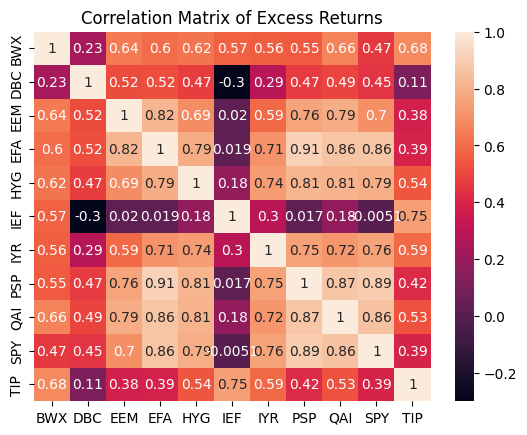

Pair with the highest correlation: EFA and PSP
Pair with the lowest correlation: IEF and DBC


In [5]:
# Calculate correlation matrix of excess returns
corr_matrix = excess_returns.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Excess Returns')
plt.show()

# Print the most and least correlated pair of assets
most_correlated = corr_matrix.stack().sort_values(ascending=False).drop_duplicates().iloc[1:]
least_correlated = most_correlated.sort_values(ascending=True)

print(f'Pair with the highest correlation: {most_correlated.index[0][0]} and {most_correlated.index[0][1]}')
print(f'Pair with the lowest correlation: {least_correlated.index[0][0]} and {least_correlated.index[0][1]}')

In [6]:
# Calculate accumulated excess returns:
accumulated_excess_returns = (1 + excess_returns).cumprod().iloc[-1] - 1
summary_statistics = summary_statistics.merge(accumulated_excess_returns.rename('Accumulated Excess Return'), left_index=True, right_index=True)
display(summary_statistics.sort_values('Accumulated Excess Return', ascending=False).T.style.format('{:.2%}'))

,SPY,PSP,IYR,EFA,HYG,TIP,QAI,IEF,EEM,BWX,DBC
(Annual) Average Excess Returns,12.70%,9.29%,7.79%,5.50%,3.74%,1.68%,1.50%,1.39%,2.70%,-1.19%,-0.91%
(Annual) Volatility of Excess Returns,14.31%,21.52%,16.96%,15.22%,7.73%,5.13%,4.90%,6.32%,17.99%,8.17%,16.85%
(Annual) Sharpe Ratios,88.76%,43.14%,45.94%,36.16%,48.33%,32.86%,30.52%,22.06%,14.98%,-14.56%,-5.39%
Min,-12.90%,-27.89%,-20.05%,-14.52%,-10.44%,-6.76%,-6.05%,-4.76%,-17.91%,-6.94%,-17.76%
Max,12.68%,17.84%,13.20%,14.29%,8.50%,4.22%,3.64%,4.61%,16.28%,7.80%,10.22%
Skewness,-40.76%,-64.16%,-45.87%,-26.65%,-48.28%,-67.71%,-53.88%,-2.96%,-10.47%,-18.48%,-49.17%
Excess Kurtosis,85.88%,257.47%,147.81%,96.72%,429.96%,273.63%,201.85%,9.83%,127.70%,71.44%,70.81%
VaR (0.05),-6.55%,-10.03%,-6.79%,-7.33%,-2.74%,-2.14%,-1.90%,-3.01%,-7.84%,-4.33%,-8.34%
CVaR (0.05),-8.54%,-14.00%,-10.06%,-9.66%,-4.90%,-3.31%,-3.17%,-3.87%,-11.11%,-5.26%,-11.31%
Accumulated Excess Return,389.52%,156.63%,137.41%,80.90%,59.85%,23.63%,20.68%,17.74%,15.84%,-18.79%,-27.47%


- *From 2011-02-01 to 2024-09-30, TIPS performed at the median of the accumulated excess returns and of the sharpe ratios.*
- *Compared to IEF (domestic treasury bonds) and BWM (international treasury bonds), it performed better in all metrics.*

***
<span style='color:rgba(180,55,10); font-weight:bold'>2.3) MV Frontier (Answer):</span>

* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

In [7]:
# Calculate the tangency portfolio and display the weights:
def calculate_tangency_portfolio_weights(excess_returns_df, cov_matrix_factor = 1):

    if cov_matrix_factor == 1:
        cov_matrix = excess_returns_df.cov()
    else:
        cov_matrix = excess_returns_df.cov()
        cov_matrix_diag = np.diag(np.diag(cov_matrix))
        cov_matrix = cov_matrix_factor * cov_matrix + (1-cov_matrix_factor) * cov_matrix_diag
    
    
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    ones = np.ones(len(excess_returns_df.columns))
    mu = excess_returns_df.mean() # Use mean monthly excess returns as a proxy for expected excess returns: (mu)

    w_t = (1 / (ones.T @ cov_matrix_inv @ mu)) * cov_matrix_inv @ mu

    return w_t

tangency_port_weighs = calculate_tangency_portfolio_weights(excess_returns, cov_matrix_factor=1)
tangency_port_weighs_df = pd.DataFrame(tangency_port_weighs, index=excess_returns.columns, columns=['Weights in tangency portfolio'])

display(tangency_port_weighs_df.sort_values('Weights in tangency portfolio', ascending = False).T.style.format('{:.2f}'))



,QAI,BWX,IYR,EFA,TIP,PSP,DBC,EEM,HYG,IEF,SPY
Weights in tangency portfolio,7.22,2.73,0.88,0.53,0.51,0.28,-0.11,-0.62,-0.83,-4.68,-4.90


In [8]:
tangency_weights_sharpe_rank = pd.merge(tangency_port_weighs_df, summary_statistics['(Annual) Sharpe Ratios'].rename('Sharpe ratio'), left_index=True, right_index=True)
tangency_weights_sharpe_rank = tangency_weights_sharpe_rank.sort_values('Weights in tangency portfolio', ascending=False)

tangency_weights_sharpe_rank['Sharpe rank'] = tangency_weights_sharpe_rank['Sharpe ratio'].rank(ascending=False)
tangency_weights_sharpe_rank['Weights rank'] = tangency_weights_sharpe_rank['Weights in tangency portfolio'].rank(ascending=False)

tangency_weights_sharpe_rank


,Weights in tangency portfolio,Sharpe ratio,Sharpe rank,Weights rank
QAI,7.2206,0.3052,7.0000,1.0000
BWX,2.7303,-0.1456,11.0000,2.0000
IYR,0.8771,0.4594,3.0000,3.0000
EFA,0.5307,0.3616,5.0000,4.0000
TIP,0.5104,0.3286,6.0000,5.0000
PSP,0.2770,0.4314,4.0000,6.0000
DBC,-0.1112,-0.0539,10.0000,7.0000
EEM,-0.6157,0.1498,9.0000,8.0000
HYG,-0.8326,0.4833,2.0000,9.0000
IEF,-4.6825,0.2206,8.0000,10.0000


- *The weights of the tangency portfolios do not align with the ranking of sharpe ratios. That is probably because of the covariance among the assets.*

In [9]:
# Calculate and display the tangency portfolio's return, volatility and Sharpe ratio
def calculate_portfolio_stats(weights, excess_returns, annual_factor=12):
    
    excess_returns_port = (excess_returns.mean() @ weights * annual_factor) # Mean monthly excess return of the tangency portfolio
    cov_matrix = excess_returns.cov()

    vol_port = (((weights.T @ cov_matrix @ weights)*annual_factor) ** 0.5)
    sharpe_ratio_port = excess_returns_port / vol_port

    return excess_returns_port, vol_port, sharpe_ratio_port

tangency_port_returns, tangency_port_vol, tangency_port_sharpe = calculate_portfolio_stats(tangency_port_weighs, excess_returns, 12)


print("(Annual Mean) Excess Return of Tangency Portfolio: {:.4%}".format(tangency_port_returns))
print("(Annual Mean) Return Variance of Tangency Portfolio: {:.4%}".format(tangency_port_vol))
print("(Annual Mean) Sharpe Ratio of Tangency Portfolio: {:.2f}".format(tangency_port_sharpe))

(Annual Mean) Excess Return of Tangency Portfolio: -52.7276%
(Annual Mean) Return Variance of Tangency Portfolio: 32.8513%
(Annual Mean) Sharpe Ratio of Tangency Portfolio: -1.61


***
<span style='color:rgba(180,55,10); font-weight:bold'>2.3) TIPS (Answer):</span>

Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

In [10]:
# Calculate the tangency portfolio weights without TIPS:
excess_returns_no_tips = excess_returns.drop('TIP', axis=1)
tangency_weighs_no_tips = calculate_tangency_portfolio_weights(excess_returns_no_tips, cov_matrix_factor=1)
tangency_weighs_no_tips_df = pd.DataFrame(tangency_weighs_no_tips, index=excess_returns_no_tips.columns, columns=['Weights in tangency portfolio'])
display(tangency_weighs_no_tips_df.sort_values('Weights in tangency portfolio', ascending = False).T.style.format('{:.4f}'))

# Calculate and display the tangency portfolio's return, volatility and Sharpe ratio
tangency_port_no_tips_returns, tangency_portf_no_tips_vol, tangency_portf_no_tips_sharpe = calculate_portfolio_stats(tangency_weighs_no_tips, excess_returns_no_tips, 12)

print("(Annual Mean) Excess Return of Tangency Portfolio: {:.4%}".format(tangency_port_no_tips_returns))
print("(Annual Mean) Return Volatility of Tangency Portfolio: {:.4%}".format(tangency_portf_no_tips_vol))
print("(Annual Mean) Sharpe Ratio of Tangency Portfolio: {:.4f}".format(tangency_portf_no_tips_sharpe))

print('\nWhen TIPS are removed from the portfolio:')
print("Variation in Excess Return: {:.4%}".format(tangency_port_no_tips_returns - tangency_port_returns))
print("Variation in Return Variance: {:.4%}".format(tangency_portf_no_tips_vol - tangency_port_vol))
print("Variation in Sharpe Ratio: {:.4f}".format(tangency_portf_no_tips_sharpe - tangency_port_sharpe))

,QAI,BWX,IYR,EFA,PSP,DBC,EEM,HYG,IEF,SPY
Weights in tangency portfolio,7.9769,3.0159,0.9902,0.5406,0.3249,-0.0910,-0.6642,-0.8716,-4.8324,-5.3893


(Annual Mean) Excess Return of Tangency Portfolio: -58.0806%
(Annual Mean) Return Volatility of Tangency Portfolio: 36.2125%
(Annual Mean) Sharpe Ratio of Tangency Portfolio: -1.6039

When TIPS are removed from the portfolio:
Variation in Excess Return: -5.3530%
Variation in Return Variance: 3.3612%
Variation in Sharpe Ratio: 0.0012


In [11]:
TIPS_adjust = 0.0012
excess_returns_adj_tips = excess_returns.copy()
excess_returns_adj_tips['TIP'] += TIPS_adjust
excess_returns_adj_tips

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2011-02-28,0.0065,0.0416,-0.0005,0.0354,0.0143,-0.0022,0.0451,0.0401,0.0025,0.0346,0.0083
2011-03-31,0.0083,0.0264,0.0627,-0.0241,0.0003,-0.0017,-0.0111,0.0165,0.0053,-0.0001,0.0129
2011-04-30,0.0483,0.0450,0.0268,0.0557,0.0154,0.0179,0.0461,0.0581,0.0185,0.0284,0.0244
2011-05-31,-0.0134,-0.0516,-0.0293,-0.0220,0.0014,0.0252,0.0102,-0.0415,0.0001,-0.0111,0.0040
2011-06-30,-0.0003,-0.0428,-0.0095,-0.0123,-0.0059,-0.0052,-0.0312,-0.0428,-0.0109,-0.0170,0.0086
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,0.0096,-0.0076,0.0149,0.0460,0.0118,0.0134,0.0447,0.0345,0.0089,0.0460,0.0144
2024-06-30,-0.0137,-0.0059,0.0220,-0.0225,0.0006,0.0080,0.0146,-0.0213,-0.0010,0.0311,0.0046
2024-07-31,0.0339,-0.0326,0.0039,0.0213,0.0189,0.0244,0.0716,0.0640,0.0067,0.0075,0.0139


In [12]:
# Calculate the tangency portfolio weights without TIPS:
TIPS_adjust = 0.0012
excess_returns_adj_tips = excess_returns.copy()
excess_returns_adj_tips['TIP'] += TIPS_adjust

tangency_weighs_adj_tips = calculate_tangency_portfolio_weights(excess_returns_adj_tips, cov_matrix_factor=1)
tangency_weighs_adj_tips_df = pd.DataFrame(tangency_weighs_adj_tips, index=excess_returns_adj_tips.columns, columns=['Weights in tangency portfolio'])
display(tangency_weighs_adj_tips_df.sort_values('Weights in tangency portfolio', ascending = False).T.style.format('{:.2f}'))

# Calculate and display the tangency portfolio's return, volatility and Sharpe ratio

tangency_port_adj_tips_returns, tangency_portf_adj_tips_vol, tangency_portf_adj_tips_sharpe = calculate_portfolio_stats(tangency_weighs_adj_tips, excess_returns_adj_tips, 12)

print("(Annual Mean) Return of Tangency Portfolio: {:.4%}".format(tangency_port_adj_tips_returns))
print("(Annual Mean) Return Volatility of Tangency Portfolio: {:.4%}".format(tangency_portf_adj_tips_vol))
print("(Annual Mean) Sharpe Ratio of Tangency Portfolio: {:.2f}".format(tangency_portf_adj_tips_sharpe))

print('\nWhen TIPS are removed from the portfolio:')
print("Variation in Expected Return: {:.2%}".format(tangency_port_adj_tips_returns - tangency_port_returns))
print("Variation in Return Variance: {:.2%}".format(tangency_portf_adj_tips_vol - tangency_port_vol))
print("Variation in Sharpe Ratio: {:.2f}".format(tangency_portf_adj_tips_sharpe - tangency_port_sharpe))

,QAI,BWX,IYR,PSP,DBC,EFA,HYG,EEM,IEF,TIP,SPY
Weights in tangency portfolio,77.46,29.26,11.38,4.73,1.77,1.45,-4.46,-5.12,-18.60,-46.90,-49.96


(Annual Mean) Return of Tangency Portfolio: -617.4021%
(Annual Mean) Return Volatility of Tangency Portfolio: 365.5768%
(Annual Mean) Sharpe Ratio of Tangency Portfolio: -1.69

When TIPS are removed from the portfolio:
Variation in Expected Return: -564.67%
Variation in Return Variance: 332.73%
Variation in Sharpe Ratio: -0.08


- *Without TIPS, the sharpe ratio remained the same, so it does not seem that adding TIPS, HMC improves the MV frontier*
- *With adjusted TIPS, the sharpe ratio decreased 0.08, suggesting that adding TIPS, HMC improves the MV frontier (provided we can short the tangency portfolio)*


***

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mutarg$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

***
<span style='color:rgba(180,55,10); font-weight:bold'>3) Answer:</span>

In [13]:
# Using the tangency portfolio with TIPS calculated earlier.
# Calculate the risk contribution of each asset in the tangency portfolio:
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

def objective_function_RP(weights, cov_matrix):    
    # Calculate individual asset risk contributions
    marginal_contributions = cov_matrix @ weights
    risk_contributions = weights * marginal_contributions
    
    # The objective is to minimize the squared differences in risk contributions
    target_risk = np.mean(risk_contributions)

    return np.sum((risk_contributions - target_risk) ** 2)


In [14]:
tangency_port_weighs_df.values

array([[ 2.73025349],
       [-0.11124148],
       [-0.61569817],
       [ 0.5306916 ],
       [-0.83257799],
       [-4.68248007],
       [ 0.87710845],
       [ 0.2770017 ],
       [ 7.22059233],
       [-4.90408578],
       [ 0.51043592]])

In [15]:
TARGET_PORT_MEAN_RETURN = .01 # MONTHLY
cov_matrix = excess_returns.cov()

weights = pd.DataFrame(index = excess_returns.columns, columns = ['Tangency', 'Tangency without TIPS',
                                                                  'Tangency with adj. TIPS', 'Equal Weights',
                                                                  'Risk Parity_simple', 'Risk Parity_optimized',
                                                                  'Regularized'])

weights.loc[:, 'Tangency'] = tangency_port_weighs_df.values

tangency_weighs_no_tips_df.loc['TIP', :] = 0
weights.loc[:, 'Tangency without TIPS'] = tangency_weighs_no_tips_df.values   
weights.loc[:, 'Tangency with adj. TIPS'] = tangency_weighs_adj_tips_df.values
weights.loc[:, 'Equal Weights'] = 1 / len(excess_returns.columns)
weights.loc[:, 'Risk Parity_simple'] = 1 / excess_returns.var()
weights.loc[:, 'Regularized'] = calculate_tangency_portfolio_weights(excess_returns, cov_matrix_factor=0.5)
weights.loc[:, 'Risk Parity_optimized'] = minimize(objective_function_RP,
                                                   x0=weights.loc[:, 'Risk Parity_simple'],  # Initial guess (equal weights)
                                                   args=(cov_matrix,),  # Additional arguments passed to the objective function
                                                   bounds=None,  # No bounds, allowing for leverage
                                                   constraints=None,  # No constraints, allowing for leverage
                                                   tol=1e-13  # Precision tolerance
                                                   ).x

# Normalize the weights to achieve the target mean return
weights *= TARGET_PORT_MEAN_RETURN / excess_returns.mean().dot(weights)
print('Weights:')
display(weights.style.format('{:.4f}'))

Weights:


,Tangency,Tangency without TIPS,Tangency with adj. TIPS,Equal Weights,Risk Parity_simple,Risk Parity_optimized,Regularized
BWX,-0.6214,-0.6231,-0.6385,0.2716,0.5229,0.4160,-0.6754
DBC,0.0253,0.0188,-0.0387,0.2716,0.1229,0.3264,-0.1362
EEM,0.1401,0.1372,0.1118,0.2716,0.1077,0.1920,-0.0662
EFA,-0.1208,-0.1117,-0.0317,0.2716,0.1506,0.2110,0.0373
HYG,0.1895,0.1801,0.0973,0.2716,0.5839,0.4087,0.3168
IEF,1.0657,0.9984,0.4060,0.2716,0.8733,1.0812,0.3935
IYR,-0.1996,-0.2046,-0.2483,0.2716,0.1213,0.1967,0.0803
PSP,-0.0630,-0.0671,-0.1031,0.2716,0.0753,0.1505,0.0495
QAI,-1.6433,-1.6481,-1.6905,0.2716,1.4522,0.6192,-0.1565
SPY,1.1161,1.1135,1.0904,0.2716,0.1704,0.2360,0.6237


In [16]:
# Here we can check that the risk contribution for each asset is not equal in the risk parity portfolio using the simple formula given,
# but it is equal in the optimized risk parity portfolio using the optimization approach.

def calculate_risk_contribution(weights, cov_matrix):
    portfolio_variance = weights.T @ cov_matrix @ weights
    marginal_contrib = cov_matrix @ weights
    risk_contrib = np.multiply(weights, marginal_contrib)
    return risk_contrib * 12 # Annualize the variance contributions

risk_contribution = pd.DataFrame(index = weights.index, columns = weights.columns)
for col in risk_contribution.columns:
    risk_contribution[col] = calculate_risk_contribution(weights[col], cov_matrix) 

print('Risk contribution (variance) of each asset:')
display(risk_contribution)

# Display total variance for each and display in frame:
total_variance = risk_contribution.sum() ** 0.5
display(total_variance.rename("Annualized volatility").to_frame().T)

Risk contribution (variance) of each asset:


,Tangency,Tangency without TIPS,Tangency with adj. TIPS,Equal Weights,Risk Parity_simple,Risk Parity_optimized,Regularized
BWX,0.0003,0.0003,0.0004,0.0046,0.0110,0.0083,-0.0014
DBC,-0.0000,-0.0000,0.0000,0.0077,0.0026,0.0083,-0.0003
EEM,0.0002,0.0002,0.0001,0.0122,0.0045,0.0083,-0.0005
EFA,-0.0003,-0.0003,-0.0001,0.0112,0.0057,0.0083,0.0004
HYG,0.0003,0.0003,0.0002,0.0054,0.0120,0.0083,0.0018
IEF,0.0007,0.0006,0.0003,0.0008,0.0084,0.0083,0.0005
IYR,-0.0007,-0.0007,-0.0009,0.0111,0.0051,0.0083,0.0011
PSP,-0.0003,-0.0003,-0.0005,0.0158,0.0041,0.0083,0.0008
QAI,-0.0011,-0.0012,-0.0012,0.0036,0.0197,0.0083,-0.0005
SPY,0.0066,0.0066,0.0065,0.0101,0.0059,0.0083,0.0079


,Tangency,Tangency without TIPS,Tangency with adj. TIPS,Equal Weights,Risk Parity_simple,Risk Parity_optimized,Regularized
Annualized volatility,0.0748,0.0748,0.0798,0.2915,0.3095,0.3023,0.1026


In [17]:
summary_statistics = pd.DataFrame(index = weights.columns, 
                                  columns = ['(Annual Mean) Excess Return', '(Annual Mean) Return Variance', '(Annual Mean) Sharpe Ratio'])
for col in weights.columns:
    
    tangency_port_returns, tangency_port_vol, tangency_port_sharpe = calculate_portfolio_stats(np.array(weights[col]), excess_returns, 12)
    summary_statistics.loc[col, '(Annual Mean) Excess Return'] = tangency_port_returns
    summary_statistics.loc[col, '(Annual Mean) Return Variance'] = tangency_port_vol
    summary_statistics.loc[col, '(Annual Mean) Sharpe Ratio'] = tangency_port_sharpe

display(summary_statistics.style.format('{:.6f}'))

,(Annual Mean) Excess Return,(Annual Mean) Return Variance,(Annual Mean) Sharpe Ratio
Tangency,0.120000,0.074765,1.605037
Tangency without TIPS,0.120000,0.074818,1.603881
Tangency with adj. TIPS,0.120000,0.079781,1.504124
Equal Weights,0.120000,0.291527,0.411625
Risk Parity_simple,0.120000,0.309515,0.387703
Risk Parity_optimized,0.120000,0.302287,0.396974
Regularized,0.120000,0.102604,1.169541


***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of `2022`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2022`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2023-2024`.

## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

***
<span style='color:rgba(180,55,10); font-weight:bold'>4.1) One-step Out-of-Sample (OOS) Performance (Answer):</span>
* Using only data through the end of `2022`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2022`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2023-2024`.

In [18]:
weights = pd.DataFrame(index = excess_returns.columns, columns = ['Tangency', 'Tangency without TIPS',
                                                                  'Tangency with adj. TIPS', 'Equal Weights',
                                                                  'Risk Parity_simple', 'Risk Parity_optimized',
                                                                  'Regularized'])

# Define in- and -out-of-sample periods
excess_returns_is = excess_returns.loc[:'2022-12-31']
excess_returns_oos = excess_returns.loc['2023-01-01':]

# Calculate the tangency portfolio weights without TIPS for the in-sample period
excess_returns_no_tips = excess_returns.drop('TIP', axis=1)
tangency_weighs_no_tips = calculate_tangency_portfolio_weights(excess_returns_no_tips, cov_matrix_factor=1)
tangency_weighs_no_tips = np.append(tangency_weighs_no_tips, 0)

# Calculate the tangency portfolio weights with adjusted TIPS for the in-sample period
excess_returns_adj_tips = excess_returns_is.copy()
excess_returns_adj_tips['TIP'] += TIPS_adjust
tangency_weighs_adj_tips = calculate_tangency_portfolio_weights(excess_returns_adj_tips, cov_matrix_factor=1)

weights.loc[:, 'Tangency'] = calculate_tangency_portfolio_weights(excess_returns_is, cov_matrix_factor=1)
weights.loc[:, 'Tangency without TIPS'] = tangency_weighs_no_tips
weights.loc[:, 'Tangency with adj. TIPS'] = tangency_weighs_adj_tips
weights.loc[:, 'Equal Weights'] = 1 / len(excess_returns.columns)
weights.loc[:, 'Risk Parity_simple'] = 1 / excess_returns.var()
weights.loc[:, 'Regularized'] = calculate_tangency_portfolio_weights(excess_returns_is, cov_matrix_factor=0.5)
weights.loc[:, 'Risk Parity_optimized'] = minimize(objective_function_RP,
                                                   x0=weights.loc[:, 'Risk Parity_simple'],  # Initial guess (equal weights)
                                                   args=(cov_matrix,),  # Additional arguments passed to the objective function
                                                   bounds=None,  # No bounds, allowing for leverage
                                                   constraints=None,  # No constraints, allowing for leverage
                                                   tol=1e-13  # Precision tolerance
                                                   ).x

display(weights.style.format('{:.2f}'))

,Tangency,Tangency without TIPS,Tangency with adj. TIPS,Equal Weights,Risk Parity_simple,Risk Parity_optimized,Regularized
BWX,4.01,3.02,-14.64,0.09,1799.05,1908.37,-0.77
DBC,-0.65,-0.09,0.56,0.09,422.88,1497.14,-0.08
EEM,-1.17,-0.66,3.24,0.09,370.62,880.67,-0.08
EFA,-0.03,0.54,3.20,0.09,518.01,967.88,0.03
HYG,-1.35,-0.87,3.33,0.09,2008.86,1874.59,0.32
IEF,-8.75,-4.83,12.02,0.09,3004.65,4959.85,0.61
IYR,1.56,0.99,-7.20,0.09,417.26,902.31,0.12
PSP,1.98,0.32,-9.29,0.09,259.03,690.35,0.01
QAI,15.02,7.98,-54.36,0.09,4996.55,2840.41,-0.31
SPY,-9.59,-5.39,33.72,0.09,586.28,1082.53,0.65


In [19]:
# Normalize the weights to achieve the target mean return
weights *= TARGET_PORT_MEAN_RETURN / excess_returns.mean().dot(weights)
display(weights.style.format('{:.2f}'))

,Tangency,Tangency without TIPS,Tangency with adj. TIPS,Equal Weights,Risk Parity_simple,Risk Parity_optimized,Regularized
BWX,-0.51,-0.62,-0.54,0.27,0.52,0.42,-0.74
DBC,0.08,0.02,0.02,0.27,0.12,0.33,-0.07
EEM,0.15,0.14,0.12,0.27,0.11,0.19,-0.07
EFA,0.00,-0.11,0.12,0.27,0.15,0.21,0.03
HYG,0.17,0.18,0.12,0.27,0.58,0.41,0.30
IEF,1.12,1.00,0.44,0.27,0.87,1.08,0.58
IYR,-0.20,-0.20,-0.26,0.27,0.12,0.20,0.11
PSP,-0.25,-0.07,-0.34,0.27,0.08,0.15,0.01
QAI,-1.93,-1.65,-1.99,0.27,1.45,0.62,-0.29
SPY,1.23,1.11,1.23,0.27,0.17,0.24,0.62


In [20]:
in_sample_statistics = pd.DataFrame(index = weights.columns, 
                                  columns = ['(Annual Mean) Excess Return', '(Annual Mean) Return Variance', '(Annual Mean) Sharpe Ratio'])
for col in weights.columns:
    
    tangency_port_returns, tangency_port_vol, tangency_port_sharpe = calculate_portfolio_stats(np.array(weights[col]), excess_returns_is, 12)
    in_sample_statistics.loc[col, '(Annual Mean) Excess Return'] = tangency_port_returns
    in_sample_statistics.loc[col, '(Annual Mean) Return Variance'] = tangency_port_vol
    in_sample_statistics.loc[col, '(Annual Mean) Sharpe Ratio'] = tangency_port_sharpe

print('In-sample statistics:')
display(in_sample_statistics.style.format('{:.6f}'))

In-sample statistics:


,(Annual Mean) Excess Return,(Annual Mean) Return Variance,(Annual Mean) Sharpe Ratio
Tangency,0.122686,0.073754,1.663449
Tangency without TIPS,0.119045,0.073897,1.610956
Tangency with adj. TIPS,0.125109,0.079850,1.566791
Equal Weights,0.105273,0.291394,0.361275
Risk Parity_simple,0.111072,0.301464,0.368444
Risk Parity_optimized,0.111738,0.295102,0.378644
Regularized,0.116144,0.101464,1.144678


In [21]:
out_of_sample_statistics = pd.DataFrame(index = weights.columns, 
                                  columns = ['(Annual Mean) Excess Return', '(Annual Mean) Return Variance', '(Annual Mean) Sharpe Ratio'])
for col in weights.columns:

    tangency_port_returns, tangency_port_vol, tangency_port_sharpe = calculate_portfolio_stats(np.array(weights[col]), excess_returns_oos, 12)
    out_of_sample_statistics.loc[col, '(Annual Mean) Excess Return'] = tangency_port_returns
    out_of_sample_statistics.loc[col, '(Annual Mean) Return Variance'] = tangency_port_vol
    out_of_sample_statistics.loc[col, '(Annual Mean) Sharpe Ratio'] = tangency_port_sharpe

print('Out-of-sample statistics:')
display(out_of_sample_statistics.style.format('{:.6f}'))

Out-of-sample statistics:


,(Annual Mean) Excess Return,(Annual Mean) Return Variance,(Annual Mean) Sharpe Ratio
Tangency,0.101708,0.101839,0.998713
Tangency without TIPS,0.126501,0.082741,1.528875
Tangency with adj. TIPS,0.085213,0.108984,0.781883
Equal Weights,0.220281,0.297960,0.739297
Risk Parity_simple,0.180792,0.367618,0.491794
Risk Parity_optimized,0.176257,0.355112,0.496343
Regularized,0.146259,0.094869,1.541683


***
<span style='color:rgba(180,55,10); font-weight:bold'>4.2) Rolling OOS Performance (Answer):</span>

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

In [22]:
years = list(range(2016, 2025))
metrics = ['Return', 'Variance', 'Sharpe']
multi_index = pd.MultiIndex.from_product([years, metrics])
rolling_oos_performance = pd.DataFrame(index=multi_index, columns=weights.columns)

for year in years:
    
    excess_returns_is = excess_returns.loc[excess_returns.index.year < year]
    excess_returns_oos = excess_returns.loc[excess_returns.index.year == year]

    weights = pd.DataFrame(index = excess_returns.columns, columns = ['Tangency', 'Tangency without TIPS',
                                                                    'Tangency with adj. TIPS', 'Equal Weights',
                                                                    'Risk Parity_simple', 'Risk Parity_optimized',
                                                                    'Regularized'])

    # Calculate the tangency portfolio weights without TIPS for the in-sample period
    excess_returns_no_tips = excess_returns.drop('TIP', axis=1)
    tangency_weighs_no_tips = calculate_tangency_portfolio_weights(excess_returns_no_tips, cov_matrix_factor=1)
    tangency_weighs_no_tips = np.append(tangency_weighs_no_tips, 0)

    # Calculate the tangency portfolio weights with adjusted TIPS for the in-sample period
    excess_returns_adj_tips = excess_returns_is.copy()
    excess_returns_adj_tips['TIP'] += TIPS_adjust
    tangency_weighs_adj_tips = calculate_tangency_portfolio_weights(excess_returns_adj_tips, cov_matrix_factor=1)

   

    weights.loc[:, 'Tangency'] = calculate_tangency_portfolio_weights(excess_returns_is, cov_matrix_factor=1)
    weights.loc[:, 'Tangency without TIPS'] = tangency_weighs_no_tips
    weights.loc[:, 'Tangency with adj. TIPS'] = tangency_weighs_adj_tips
    weights.loc[:, 'Equal Weights'] = 1 / len(excess_returns.columns)
    weights.loc[:, 'Risk Parity_simple'] = 1 / excess_returns.var()
    weights.loc[:, 'Regularized'] = calculate_tangency_portfolio_weights(excess_returns_is, cov_matrix_factor=0.5)
    weights.loc[:, 'Risk Parity_optimized'] = minimize(objective_function_RP,
                                                       x0=weights.loc[:, 'Risk Parity_simple'],  # Initial guess (equal weights)
                                                       args=(cov_matrix,),  # Additional arguments passed to the objective function
                                                       bounds=None,  # No bounds, allowing for leverage
                                                       constraints=None,  # No constraints, allowing for leverage
                                                       tol=1e-13  # Precision tolerance
                                                       ).x


    # Normalize the weights to achieve the target mean return
    weights *= TARGET_PORT_MEAN_RETURN / excess_returns.mean().dot(weights)

    # Calculate the portfolios' statistics for the 1 year ahead
    for col in weights.columns:

        tangency_port_returns, tangency_port_vol, tangency_port_sharpe = calculate_portfolio_stats(np.array(weights[col]), excess_returns_oos, 12)

        rolling_oos_performance.loc[(year, 'Return'), col] = tangency_port_returns
        rolling_oos_performance.loc[(year, 'Variance'), col] = tangency_port_vol
        rolling_oos_performance.loc[(year, 'Sharpe'), col] = tangency_port_sharpe
    

print('Out-of-sample statistics:')
display(rolling_oos_performance)


Out-of-sample statistics:


Tangency Tangency without TIPS Tangency with adj. TIPS Equal Weights Risk Parity_simple Risk Parity_optimized Regularized
2016 Return     0.1051                0.1410                  0.1124        0.2141             0.2184                0.2366      0.0485
     Variance   0.0534                0.0636                  0.0552        0.2246             0.2554                0.2415      0.0765
     Sharpe     1.9677                2.2178                  2.0362        0.9533             0.8548                0.9799      0.6347
2017 Return     0.1062                0.0866                  0.0961        0.3552             0.3329                0.3441      0.0897
     Variance   0.0337                0.0329                  0.0334        0.0584             0.0818                0.0753      0.0395
     Sharpe     3.1551                2.6271                  2.8737        6.0800             4.0713                4.5712      2.2693
2018 Return     0.0347                0.0447                  0.0328       -0.2402            -0.2437               -0.2448     -0.0334
     Variance   0.0768                0.0799                  0.0760        0.2134             0.1833                0.1887      0.1032
     Sharpe     0.4516                0.5587                  0.4316       -1.1257            -1.3290               -1.2971     -0.3236
2019 Return     0.1978                0.1793                  0.1900        0.4195             0.4465                0.4510      0.2437
     Variance   0.0790                0.0709                  0.0784        0.2179             0.1848                0.1968      0.0727
     Sharpe     2.5020                2.5275                  2.4238        1.9249             2.4162                2.2913      3.3518
2020 Return     0.2740                0.1790                  0.2865        0.2580             0.4224                0.3591      0.2246
     Variance   0.1177                0.1055                  0.1261        0.5278             0.4651                0.4803      0.1810
     Sharpe     2.3270                1.6974                  2.2712        0.4888             0.9081                0.7476      1.2405
2021 Return     0.0977                0.2258                  0.1371        0.3423             0.1868                0.2880      0.0904
     Variance   0.1096                0.0707                  0.1113        0.1935             0.1806                0.1915      0.1168
     Sharpe     0.8919                3.1930                  1.2323        1.7688             1.0346                1.5038      0.7739
2022 Return    -0.1850               -0.0254                 -0.1686       -0.4838            -0.7657               -0.6487     -0.3504
     Variance   0.1789                0.1150                  0.1891        0.4542             0.5768                0.5321      0.2612
     Sharpe    -1.0345               -0.2206                 -0.8918       -1.0651            -1.3276               -1.2192     -1.3418
2023 Return     0.0475                0.0870                  0.0246        0.2099             0.1698                0.1556      0.1294
     Variance   0.1030                0.0771                  0.1092        0.3692             0.4456                0.4350      0.1060
     Sharpe     0.4612                1.1274                  0.2252        0.5684             0.3811                0.3578      1.2199
2024 Return     0.1764                0.1792                  0.1692        0.2342             0.1954                0.2037      0.1743
     Variance   0.0954                0.0921                  0.1009        0.1857             0.2546                0.2345      0.0791
     Sharpe     1.8495                1.9464                  1.6766        1.2612             0.7676                0.8689      2.2041

***

In [23]:
#Delete:

import pandas as pd
import numpy as np
from arch import arch_model
import math
import datetime
pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 30)
from typing import Union, List
from pandas import Timestamp

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize

import warnings
warnings.filterwarnings("ignore")

from collections import defaultdict

from scipy.stats import norm

import re

def read_excel_default(excel_name: str, sheet_name: str = None, index_col : int = 0, parse_dates: bool =True, print_sheets: bool = False, **kwargs):
    """
    Reads an Excel file and returns a DataFrame with specified options.

    Parameters:
    excel_name (str): The path to the Excel file.
    index_col (int, default=0): Column to use as the row index labels of the DataFrame.
    parse_dates (bool, default=True): Boolean to parse dates.
    print_sheets (bool, default=False): If True, prints the names and first few rows of all sheets.
    sheet_name (str or int, default=None): Name or index of the sheet to read. If None, reads the first sheet.
    **kwargs: Additional arguments passed to `pd.read_excel`.

    Returns:
    pd.DataFrame: DataFrame containing the data from the specified Excel sheet.

    Notes:
    - If `print_sheets` is True, the function will print the names and first few rows of all sheets and return None.
    - The function ensures that the index name is set to 'date' if the index column name is 'date' or 'dates', or if the index contains date-like values.
    """
    if print_sheets:
        excel_file = pd.ExcelFile(excel_name)  # Load the Excel file to get sheet names
        sheet_names = excel_file.sheet_names
        n = 0
        while True:
            try:
                sheet = pd.read_excel(excel_name, sheet_name=n)
                print(f'Sheet name: {sheet_names[n]}')
                print("Columns: " + ", ".join(list(sheet.columns)))
                print(sheet.head(3))
                n += 1
                print('-' * 70)
                print('\n')
            except:
                return
    sheet_name = 0 if sheet_name is None else sheet_name
    data = pd.read_excel(excel_name, index_col=index_col, parse_dates=parse_dates,  sheet_name=sheet_name, **kwargs)
    if data.index.name is not None:
        if data.index.name.lower() in ['date', 'dates']:
            data.index.name = 'date'
    elif isinstance(data.index[0], (datetime.date, datetime.datetime)):
        data.index.name = 'date'
    return data


def returns_to_df(returns: Union[pd.DataFrame, pd.Series, List[pd.Series]], name: str = "Returns"):
    """
    Converts returns to a DataFrame if it is a Series or a list of Series.

    Parameters:
    returns (pd.DataFrame, pd.Series or List or pd.Series): Time series of returns.

    Returns:
    pd.DataFrame: DataFrame of returns.
    """
    if isinstance(returns, pd.DataFrame):
        returns = returns.copy()
    if isinstance(returns, pd.Series):
        returns = returns.to_frame()
    elif isinstance(returns, list):
        returns_list = returns.copy()
        returns = pd.DataFrame({})

        for series in returns_list:
            if isinstance(series, pd.Series):
                returns = returns.merge(series, right_index=True, left_index=True, how='outer')
            else:
                raise TypeError(f'{name} must be either a pd.DataFrame or a list of pd.Series')
            
    # Convert returns to float
    try:
        returns = returns.apply(lambda x: x.astype(float))
    except ValueError:
        print(f'Could not convert {name} to float. Check if there are any non-numeric values')
        pass

    return returns


def fix_dates_index(returns: pd.DataFrame):
    """
    Fixes the date index of a DataFrame if it is not in datetime format and convert returns to float.

    Parameters:
    returns (pd.DataFrame): DataFrame of returns.

    Returns:
    pd.DataFrame: DataFrame with datetime index.
    """
    # Check if 'date' is in the columns and set it as the index

    if 'date' in returns.columns.str.lower():
        returns = returns.rename({'Date': 'date'}, axis=1)
        returns = returns.set_index('date')
    returns.index.name = 'date'

    # Convert dates to datetime
    try:
        returns.index = pd.to_datetime(returns.index.map(lambda x: x.date()))
    except ValueError:
        print('Could not convert the index to datetime. Check the index format for invalid dates.')
    
    # Convert returns to float
    try:
        returns = returns.apply(lambda x: x.astype(float))
    except ValueError:
        print('Could not convert returns to float. Check if there are any non-numeric values')
        pass

    return returns


def filter_columns_and_indexes(
    df: pd.DataFrame,
    keep_columns: Union[list, str],
    drop_columns: Union[list, str],
    keep_indexes: Union[list, str],
    drop_indexes: Union[list, str]
):
    """
    Filters a DataFrame based on specified columns and indexes.

    Parameters:
    df (pd.DataFrame): DataFrame to be filtered.
    keep_columns (list or str): Columns to keep in the DataFrame.
    drop_columns (list or str): Columns to drop from the DataFrame.
    keep_indexes (list or str): Indexes to keep in the DataFrame.
    drop_indexes (list or str): Indexes to drop from the DataFrame.

    Returns:
    pd.DataFrame: The filtered DataFrame.
    """

    if not isinstance(df, (pd.DataFrame, pd.Series)):
        return df
    
    df = df.copy()

    # Columns
    if keep_columns is not None:
        keep_columns = "(?i)" + "|".join(keep_columns) if isinstance(keep_columns, list) else "(?i)" + keep_columns
        df = df.filter(regex=keep_columns)
        if drop_columns is not None:
            print('Both "keep_columns" and "drop_columns" were specified. "drop_columns" will be ignored.')

    elif drop_columns is not None:
        drop_columns = "(?i)" + "|".join(drop_columns) if isinstance(drop_columns, list) else "(?i)" + drop_columns
        df = df.drop(columns=df.filter(regex=drop_columns).columns)

    # Indexes
    if keep_indexes is not None:
        keep_indexes = "(?i)" + "|".join(keep_indexes) if isinstance(keep_indexes, list) else "(?i)" + keep_indexes
        df = df.filter(regex=keep_indexes, axis=0)
        if drop_indexes is not None:
            print('Both "keep_indexes" and "drop_indexes" were specified. "drop_indexes" will be ignored.')

    elif drop_indexes is not None:
        drop_indexes = "(?i)" + "|".join(drop_indexes) if isinstance(drop_indexes, list) else "(?i)" + drop_indexes
        df = df.filter(regex=keep_indexes, axis=0)
    
    return df


def calc_cummulative_returns(
    returns: Union[pd.DataFrame, pd.Series, List[pd.Series]],
    return_plot: bool = True,
    fig_size: Union[int, float] = 7,
    return_series: bool = False,
    name: str = None,
    timeframes: Union[None, dict] = None,
):
    """
    Calculates cumulative returns from a time series of returns.

    Parameters:
    returns (pd.DataFrame, pd.Series or List or pd.Series): Time series of returns.
    return_plot (bool, default=True): If True, plots the cumulative returns.
    fig_size (int or float, default = 7): Size of the plot for cumulative returns. Scale: 1.5
    return_series (bool, default=False): If True, returns the cumulative returns as a DataFrame.
    name (str, default=None): Name for the title of the plot or the cumulative return series.
    timeframes (dict or None, default=None): Dictionary of timeframes to calculate cumulative returns for each period.

    Returns:
    pd.DataFrame or None: Returns cumulative returns DataFrame if `return_series` is True.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    if timeframes is not None:
        for name, timeframe in timeframes.items():
            if timeframe[0] and timeframe[1]:
                timeframe_returns = returns.loc[timeframe[0]:timeframe[1]]
            elif timeframe[0]:
                timeframe_returns = returns.loc[timeframe[0]:]
            elif timeframe[1]:
                timeframe_returns = returns.loc[:timeframe[1]]
            else:
                timeframe_returns = returns.copy()
            if len(timeframe_returns.index) == 0:
                raise Exception(f'No returns data for {name} timeframe')
            calc_cummulative_returns(
                timeframe_returns,
                return_plot=True,
                fig_size=fig_size,
                return_series=False,
                name=name,
                timeframes=None
            )
        return
   
    returns = (1 + returns).cumprod()
    returns = returns - 1
    title = f'Cummulative Returns {name}' if name else 'Cummulative Returns'
    if return_plot:
        returns.plot(
            title=title,
            figsize=(fig_size*1.5, fig_size),
            grid=True,
            xlabel='Date',
            ylabel='Cummulative Returns'
        )
    if return_series == True or return_plot == False:
        return returns


def calc_portfolio_returns(
    returns: Union[pd.DataFrame, List[pd.Series]],
    weights: Union[dict, list, pd.Series, pd.DataFrame],
    port_name: Union[None, str] = None
):
    """
    Creates a portfolio by applying the specified weights to the asset returns.

    Parameters:
    returns (pd.DataFrame or List of pd.Series): Time series of asset returns.
    weights (list or pd.Series): Weights to apply to the returns. If a list or pd.Series is provided, it will be converted into a dict.
    port_name (str or None, default=None): Name for the portfolio. If None, a name will be generated based on asset weights.

    Returns:
    pd.DataFrame: The portfolio returns based on the provided weights.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float
    
    if isinstance(weights, list):
        print("Weights are a list. Converting to dict assuming same order as columns in returns")
        weights = dict(zip(returns.columns, weights))
    elif isinstance(weights, pd.Series):
        weights = weights.to_dict()
    elif isinstance(weights, pd.DataFrame):
        weights = list(weights.to_dict().values())[0]
    elif isinstance(weights, dict):
        pass
    else:
        raise Exception("Weights must be a dict, list, pd.Series, or pd.DataFrame")
    
    # Check returns size and weight size:
    if returns.shape[1] != len(weights):
        raise Exception(f"Returns have {returns.shape[1]} assets, but {len(weights)} weights were provided")

    returns = returns[list(weights.keys())]
    port_returns = pd.DataFrame(returns @ list(weights.values()))

    if port_name is None:
        print("Portfolio: "+" + ".join([f"{n} ({w:.2%})" for n, w in weights.items()]))
        port_name = 'Portfolio'
    port_returns.columns = [port_name]

    return port_returns


def calc_returns_statistics(
    returns: Union[pd.DataFrame, pd.Series, List[pd.Series]],
    annual_factor: int = None,
    provided_excess_returns: bool = None,
    rf: Union[pd.Series, pd.DataFrame] = None,
    var_quantile: Union[float , List] = .05,
    timeframes: Union[None, dict] = None,
    return_tangency_weights: bool = True,
    correlations: Union[bool, List] = True,
    tail_risks: bool = True,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None,
    _timeframe_name: str = None,
):
    """
    Calculates summary statistics for a time series of returns.   

    Parameters:
    returns (pd.DataFrame, pd.Series or List or pd.Series): Time series of returns.
    annual_factor (int, default=None): Factor for annualizing returns.
    provided_excess_returns (bool, default=None): Whether excess returns are already provided.
    rf (pd.Series or pd.DataFrame, default=None): Risk-free rate data.
    var_quantile (float or list, default=0.05): Quantile for Value at Risk (VaR) calculation.
    timeframes (dict or None, default=None): Dictionary of timeframes [start, finish] to calculate statistics for each period.
    return_tangency_weights (bool, default=True): If True, returns tangency portfolio weights.
    correlations (bool or list, default=True): If True, returns correlations, or specify columns for correlations.
    tail_risks (bool, default=True): If True, include tail risk statistics.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Summary statistics of the returns.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    if rf is not None:
        rf = returns_to_df(rf) # Convert returns to DataFrame if it is a Series
        fix_dates_index(rf) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float
        if len(rf.index) != len(returns.index):
            raise Exception('"rf" index must be the same lenght as "returns"')
        if type(rf) == pd.DataFrame:
            rf = rf.iloc[:, 0].to_list()
        elif type(rf) == pd.Series:
            rf = rf.to_list()

    # Assume annualization factor of 12 for monthly returns if None and notify user
    if annual_factor is None:
        print('Assuming monthly returns with annualization term of 12')
        annual_factor = 12

    if keep_columns is None:
        keep_columns = ['Accumulated Return', 'Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Min', 'Mean', 'Max']
        if tail_risks == True:
            keep_columns += ['Skewness', 'Excess Kurtosis', 'Historical VaR (5.0%)', 'Historical CVaR (5.0%)', 'Max Drawdown', 
                        'Peak Date', 'Bottom Date', 'Recovery', 'Duration (days)']

    # Iterate to calculate statistics for multiple timeframes
    if isinstance(timeframes, dict):
        all_timeframes_summary_statistics = pd.DataFrame({})
        for name, timeframe in timeframes.items():
            if timeframe[0] and timeframe[1]:
                timeframe_returns = returns.loc[timeframe[0]:timeframe[1]]
            elif timeframe[0]:
                timeframe_returns = returns.loc[timeframe[0]:]
            elif timeframe[1]:
                timeframe_returns = returns.loc[:timeframe[1]]
            else:
                timeframe_returns = returns.copy()
            if len(timeframe_returns.index) == 0:
                raise Exception(f'No returns data for {name} timeframe')
            
            timeframe_returns = timeframe_returns.rename(columns=lambda col: col + f' ({name})')
            timeframe_summary_statistics = calc_returns_statistics(
                returns=timeframe_returns,
                annual_factor=annual_factor,
                provided_excess_returns=provided_excess_returns,
                rf=rf,
                var_quantile=var_quantile,
                timeframes=None,
                correlations=correlations,
                _timeframe_name=name,
                keep_columns=keep_columns,
                drop_columns=drop_columns,
                keep_indexes=keep_indexes,
                drop_indexes=drop_indexes
            )
            all_timeframes_summary_statistics = pd.concat(
                [all_timeframes_summary_statistics, timeframe_summary_statistics],
                axis=0
            )
        return all_timeframes_summary_statistics

    # Calculate summary statistics for a single timeframe
    summary_statistics = pd.DataFrame(index=returns.columns)
    summary_statistics['Mean'] = returns.mean()
    summary_statistics['Annualized Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std()
    summary_statistics['Annualized Vol'] = returns.std() * np.sqrt(annual_factor)

    if provided_excess_returns is True:
        if rf is not None:
            print('Excess returns and risk-free were both provided.'
                ' Excess returns will be consider as is, and risk-free rate given will be ignored.\n')
        summary_statistics['Sharpe'] = returns.mean() / returns.std()
    else:
        try:
            if rf is None:
                print('No risk-free rate provided. Interpret "Sharpe" as "Mean/Volatility".\n')
                summary_statistics['Sharpe'] = returns.mean() / returns.std()
            else:
                excess_returns = returns.apply(lambda x: x - rf)

                summary_statistics['Sharpe'] = excess_returns.mean() / returns.std()
        except Exception as e:
            print(f'Could not calculate Sharpe: {e}')

    summary_statistics['Annualized Sharpe'] = summary_statistics['Sharpe'] * np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    
    if tail_risks == True:
        tail_risk_stats = stats_tail_risk(returns,
                                        annual_factor=annual_factor,
                                        var_quantile=var_quantile,
                                        keep_indexes=keep_indexes,
                                        drop_indexes=drop_indexes)

        summary_statistics = summary_statistics.join(tail_risk_stats)
    
    if return_tangency_weights is True:
        tangency_weights = calc_tangency_port(returns)
        summary_statistics = summary_statistics.join(tangency_weights)

    if correlations is True or isinstance(correlations, list):
        returns_corr = returns.corr()
        if _timeframe_name:
            returns_corr = returns_corr.rename(columns=lambda col: col.replace(f' {_timeframe_name}', ''))
        returns_corr = returns_corr.rename(columns=lambda col: col + ' Correlation')
        if isinstance(correlations, list):
            correlation_names = [col + ' Correlation' for col  in correlations]
            # Check if all selected columns exist in returns_corr
            not_in_returns_corr = [col for col in correlation_names if col not in returns_corr.columns]
            if len(not_in_returns_corr) > 0:
                not_in_returns_corr = ", ".join([c.replace(' Correlation', '') for c in not_in_returns_corr])
                raise Exception(f'{not_in_returns_corr} not in returns columns')
            returns_corr = returns_corr[[col + ' Correlation' for col  in correlations]]
        summary_statistics = summary_statistics.join(returns_corr)
    
    return filter_columns_and_indexes(
        summary_statistics,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


def stats_tail_risk(
    returns: Union[pd.DataFrame, pd.Series, List[pd.Series]],
    annual_factor: int = None,
    var_quantile: Union[float , List] = .05,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None,
):
    """
    Calculates tail risk summary statistics for a time series of returns.   

    Parameters:
    returns (pd.DataFrame, pd.Series or List or pd.Series): Time series of returns.
    annual_factor (int, default=None): Factor for annualizing returns.
    var_quantile (float or list, default=0.05): Quantile for Value at Risk (VaR) calculation.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: tail risk summary statistics of the returns.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    tail_risk_stats = pd.DataFrame(index=returns.columns)

    tail_risk_stats['Skewness'] = returns.skew()
    tail_risk_stats['Excess Kurtosis'] = returns.kurtosis()
    var_quantile = [var_quantile] if isinstance(var_quantile, (float, int)) else var_quantile
    for var_q in var_quantile:
        tail_risk_stats[f'Historical VaR ({var_q:.1%})'] = returns.quantile(var_q, axis = 0)
        tail_risk_stats[f'Historical CVaR ({var_q:.1%})'] = returns[returns <= returns.quantile(var_q, axis = 0)].mean()
        if annual_factor:
            tail_risk_stats[f'Annualized Historical VaR ({var_q:.1%})'] = returns.quantile(var_q, axis = 0) * np.sqrt(annual_factor)
            tail_risk_stats[f'Annualized Historical CVaR ({var_q:.1%})'] = returns[returns <= returns.quantile(var_q, axis = 0)].mean() * np.sqrt(annual_factor)
    
    cum_returns = (1 + returns).cumprod()
    maximum = cum_returns.cummax()
    drawdown = cum_returns / maximum - 1

    tail_risk_stats['Accumulated Return'] = cum_returns.iloc[-1] - 1
    tail_risk_stats['Max Drawdown'] = drawdown.min()
    tail_risk_stats['Peak Date'] = [maximum[col][:drawdown[col].idxmin()].idxmax() for col in maximum.columns]
    tail_risk_stats['Bottom Date'] = drawdown.idxmin()
    
    recovery_date = []
    for col in cum_returns.columns:
        prev_max = maximum[col][:drawdown[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([cum_returns[col][drawdown[col].idxmin():]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
    tail_risk_stats['Recovery'] = recovery_date

    tail_risk_stats["Duration (days)"] = [
        (i - j).days if i != pd.NaT else "-" for i, j in
        zip(tail_risk_stats["Recovery"], tail_risk_stats["Bottom Date"])
    ]

    return filter_columns_and_indexes(
        tail_risk_stats,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


def calc_neg_pos_pct(
    returns: Union[pd.DataFrame, pd.Series, List[pd.Series]],
    calc_positive: bool = False,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Calculates the percentage of negative and positive returns in the provided data.

    Parameters:
    returns (pd.DataFrame, pd.Series or List or pd.Series): Time series of returns.
    calc_positive (bool, default=False): If True, calculates the percentage of positive returns.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: A DataFrame with the percentage of negative or positive returns, number of returns, and the count of negative/positive returns.
    """
    
    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    prev_len_index = returns.apply(lambda x: len(x))
    returns  =returns.dropna(axis=0)
    new_len_index = returns.apply(lambda x: len(x))
    if not (prev_len_index == new_len_index).all():
        print('Some columns had NaN values and were dropped')
    if calc_positive:
        returns = returns.applymap(lambda x: 1 if x > 0 else 0)
    else:
        returns = returns.applymap(lambda x: 1 if x < 0 else 0)

    negative_statistics = (
        returns
        .agg(['mean', 'count', 'sum'])
        .set_axis(['% Negative Returns', 'Nº Returns', 'Nº Negative Returns'], axis=0)
    )

    if calc_positive:
        negative_statistics = negative_statistics.rename(lambda i: i.replace('Negative', 'Positive'), axis=0)

    return filter_columns_and_indexes(
        negative_statistics,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


# CHECK THIS FUNCTION
def get_best_and_worst(
    summary_statistics: pd.DataFrame,
    stat: str = 'Annualized Sharpe',
    return_all_stats: bool = True
):
    """
    Identifies the best and worst assets based on a specified statistic.

    Parameters:
    summary_statistics (pd.DataFrame): DataFrame containing summary statistics.
    stat (str, default='Annualized Sharpe'): The statistic to compare assets by.
    return_df (bool, default=True): If True, returns a DataFrame with the best and worst assets.

    Returns:
    pd.DataFrame or None: DataFrame with the best and worst assets if `return_df` is True.
    """
    summary_statistics = summary_statistics.copy()

    if len(summary_statistics.index) < 2:
        raise Exception('"summary_statistics" must have at least two lines in order to do comparison')

    if stat not in summary_statistics.columns:
        raise Exception(f'{stat} not in "summary_statistics"')
    
    best_stat = summary_statistics[stat].max()
    worst_stat = summary_statistics[stat].min()
    asset_best_stat = summary_statistics.loc[lambda df: df[stat] == df[stat].max()].index[0]
    asset_worst_stat = summary_statistics.loc[lambda df: df[stat] == df[stat].min()].index[0]
    print(f'The asset with the highest {stat} is {asset_best_stat}: {best_stat:.5f}')
    print(f'The asset with the lowest {stat} is {asset_worst_stat}: {worst_stat:.5f}')
    if return_all_stats:
        return pd.concat([
            summary_statistics.loc[lambda df: df.index == asset_best_stat],
            summary_statistics.loc[lambda df: df.index == asset_worst_stat]
        ])
    

def calc_correlations(
    returns: Union[pd.DataFrame, pd.Series, List[pd.Series]],
    print_highest_lowest: bool = True,
    matrix_size: Union[int, float] = 7,
    show_heatmap: bool = False,
    return_matrix: bool = True,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Calculates the correlation matrix of the provided returns and optionally prints or visualizes it.

    Parameters:
    returns (pd.DataFrame, pd.Series or List or pd.Series): Time series of returns.
    print_highest_lowest (bool, default=True): If True, prints the highest and lowest correlations.
    matrix_size (int or float, default=7): Size of the heatmap for correlation matrix visualization.
    show_heatmap (bool, default=False): If True, returns a heatmap of the correlation matrix.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    sns.heatmap or pd.DataFrame: Heatmap of the correlation matrix or the correlation matrix itself.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    returns = filter_columns_and_indexes(
        returns,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )

    correlation_matrix = returns.corr()

    if print_highest_lowest:
        highest_lowest_corr = (
            correlation_matrix
            .unstack()
            .sort_values()
            .reset_index()
            .set_axis(['asset_1', 'asset_2', 'corr'], axis=1)
            .loc[lambda df: df.asset_1 != df.asset_2]
        )
        highest_corr = highest_lowest_corr.iloc[lambda df: len(df)-1, :]
        lowest_corr = highest_lowest_corr.iloc[0, :]
        print(f'The highest correlation ({highest_corr["corr"]:.4f}) is between {highest_corr.asset_1} and {highest_corr.asset_2}')
        print(f'The lowest correlation ({lowest_corr["corr"]:.4f}) is between {lowest_corr.asset_1} and {lowest_corr.asset_2}')

    if show_heatmap == True:
        fig, ax = plt.subplots(figsize=(matrix_size * 1.5, matrix_size))
        heatmap = sns.heatmap(
            correlation_matrix, 
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot=True,
        )
        plt.show()

    if return_matrix:
        return correlation_matrix
    else:
        return None
    


def calc_ewma_volatility(
        returns: pd.Series,
        theta : float = 0.94,
        initial_vol : float = .2 / np.sqrt(252)
    ) -> pd.Series:
    var_t0 = initial_vol ** 2
    ewma_var = [var_t0]
    for i in range(len(returns.index)):
        new_ewma_var = ewma_var[-1] * theta + (returns.iloc[i] ** 2) * (1 - theta)
        ewma_var.append(new_ewma_var)
    ewma_var.pop(0) # Remove var_t0
    ewma_vol = [np.sqrt(v) for v in ewma_var]
    return pd.Series(ewma_vol, index=returns.index)


def calc_garch_volatility(
        returns: pd.Series,
        p: int = 1,
        q: int = 1
    ):
    model = arch_model(returns, vol='Garch', p=p, q=q)
    fitted_model = model.fit(disp='off')
    fitted_values = fitted_model.conditional_volatility
    return pd.Series(fitted_values, index=returns.index)


def calc_var_cvar_summary(
    returns: Union[pd.Series, pd.DataFrame],
    percentile: Union[None, float] = .05,
    window: Union[None, str] = None,
    return_hit_ratio: bool = False,
    filter_first_hit_ratio_date: Union[None, str, datetime.date] = None,
    z_score: float = None,
    shift: int = 1,
    std_formula: bool = False,
    ewma_theta : float = .94,
    ewma_initial_vol : float = .2 / np.sqrt(252),
    garch_p: int = 1,
    garch_q: int = 1,
    return_stats: Union[str, list] = ['Returns', 'VaR', 'CVaR', 'Vol'],
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Calculates a summary of VaR (Value at Risk) and CVaR (Conditional VaR) for the provided returns.

    Parameters:
    returns (pd.Series or pd.DataFrame): Time series of returns.
    percentile (float or None, default=0.05): Percentile to calculate the VaR and CVaR.
    window (str or None, default=None): Window size for rolling calculations.
    return_hit_ratio (bool, default=False): If True, returns the hit ratio for the VaR.
    filter_first_hit_ratio_date (str, datetime.date or None, default=None): Date to filter the hit ratio calculation from then on.
    z_score (float, default=None): Z-score for parametric VaR calculation, in case no percentile is provided.
    shift (int, default=1): Period shift for VaR/CVaR calculations.
    std_formula (bool, default=False): If True, uses the normal volatility formula with .std(). Else, use squared returns.
    return_stats (str or list, default=['Returns', 'VaR', 'CVaR', 'Vol']): Statistics to return in the summary.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Summary of VaR and CVaR statistics.
    """
    if window is None:
        print('Using "window" of 60 periods, since none was specified')
        window = 60
    if isinstance(returns, pd.DataFrame):
        returns_series = returns.iloc[:, 0]
        returns_series.index = returns.index
        returns = returns_series.copy()
    elif isinstance(returns, pd.Series):
        returns = returns.copy()
    else:
        raise TypeError('returns must be either a pd.DataFrame or a pd.Series')

    summary = pd.DataFrame({})

    # Returns
    summary[f'Returns'] = returns

    # VaR
    summary[f'Expanding {window} Historical VaR ({percentile:.0%})'] = returns.expanding(min_periods=window).quantile(percentile)
    summary[f'Rolling {window} Historical VaR ({percentile:.0%})'] = returns.rolling(window=window).quantile(percentile)
    if std_formula:
        summary[f'Expanding {window} Volatility'] = returns.expanding(window).std()
        summary[f'Rolling {window} Volatility'] = returns.rolling(window).std()
    else: # Volaility assuming zero mean returns
        summary[f'Expanding {window} Volatility'] = np.sqrt((returns ** 2).expanding(window).mean())
        summary[f'Rolling {window} Volatility'] = np.sqrt((returns ** 2).rolling(window).mean())
    summary[f'EWMA {ewma_theta:.2f} Volatility'] = calc_ewma_volatility(returns, theta=ewma_theta, initial_vol=ewma_initial_vol)
    summary[f'GARCH({garch_p:.0f}, {garch_q:.0f}) Volatility'] = calc_garch_volatility(returns, p=garch_p, q=garch_q)
    
    # Parametric VaR assuming zero mean returns
    z_score = norm.ppf(percentile) if z_score is None else z_score
    summary[f'Expanding {window} Parametric VaR ({percentile:.0%})'] = summary[f'Expanding {window} Volatility'] * z_score
    summary[f'Rolling {window} Parametric VaR ({percentile:.0%})'] = summary[f'Rolling {window} Volatility'] * z_score
    summary[f'EWMA {ewma_theta:.2f} Parametric VaR ({percentile:.0%})'] = summary[f'EWMA {ewma_theta:.2f} Volatility'] * z_score
    summary[f'GARCH({garch_p:.0f}, {garch_q:.0f}) Parametric VaR ({percentile:.0%})'] = summary[f'GARCH({garch_p:.0f}, {garch_q:.0f}) Volatility'] * z_score

    if return_hit_ratio:
        var_stats = [
            f'Expanding {window} Historical VaR ({percentile:.0%})',
            f'Rolling {window} Historical VaR ({percentile:.0%})',
            f'Expanding {window} Parametric VaR ({percentile:.0%})',
            f'Rolling {window} Parametric VaR ({percentile:.0%})',
            f'EWMA {ewma_theta:.2f} Parametric VaR ({percentile:.0%})',
            f'GARCH({garch_p:.0f}, {garch_q:.0f}) Parametric VaR ({percentile:.0%})'
        ]
        
        summary_hit_ratio = summary.copy()
        summary_hit_ratio[var_stats] = summary_hit_ratio[var_stats].shift()
        if filter_first_hit_ratio_date:
            if isinstance(filter_first_hit_ratio_date, (datetime.date, datetime.datetime)):
                filter_first_hit_ratio_date = filter_first_hit_ratio_date.strftime("%Y-%m-%d")
            summary_hit_ratio = summary.loc[filter_first_hit_ratio_date:]
        summary_hit_ratio = summary_hit_ratio.dropna(axis=0)
        summary_hit_ratio[var_stats] = summary_hit_ratio[var_stats].apply(lambda x: (x - summary['Returns']) > 0)
        
        hit_ratio = pd.DataFrame(summary_hit_ratio[var_stats].mean(), columns=['Hit Ratio'])
        hit_ratio['Hit Ratio Error'] = (hit_ratio['Hit Ratio'] - percentile) / percentile
        hit_ratio['Hit Ratio Absolute Error'] = abs(hit_ratio['Hit Ratio Error'])
        hit_ratio = hit_ratio.sort_values('Hit Ratio Absolute Error')

        if z_score is not None:
            hit_ratio = hit_ratio.rename(lambda col: re.sub(r'VaR \(\d+%\)', f'VaR ({z_score:.2f})', col), axis=1) # Rename columns
        return filter_columns_and_indexes(
            hit_ratio,
            keep_columns=keep_columns,
            drop_columns=drop_columns,
            keep_indexes=keep_indexes,
            drop_indexes=drop_indexes
        )

    # CVaR
    summary[f'Expanding {window} Historical CVaR ({percentile:.0%})'] = returns.expanding(window).apply(lambda x: x[x < x.quantile(percentile)].mean())
    summary[f'Rolling {window} Historical CVaR ({percentile:.0%})'] = returns.rolling(window).apply(lambda x: x[x < x.quantile(percentile)].mean())
    summary[f'Expanding {window} Parametrical CVaR ({percentile:.0%})'] = - norm.pdf(z_score) / percentile * summary[f'Expanding {window} Volatility']
    summary[f'Rolling {window} Parametrical CVaR ({percentile:.0%})'] = - norm.pdf(z_score) / percentile * summary[f'Rolling {window} Volatility']
    summary[f'EWMA {ewma_theta:.2f} Parametrical CVaR ({percentile:.0%})'] = - norm.pdf(z_score) / percentile * summary[f'EWMA {ewma_theta:.2f} Volatility']
    summary[f'GARCH({garch_p:.0f}, {garch_q:.0f}) Parametrical CVaR ({percentile:.0%})'] = - norm.pdf(z_score) / percentile * summary[f'GARCH({garch_p:.0f}, {garch_q:.0f}) Volatility']

    if shift > 0:
        shift_columns = [c for c in summary.columns if not bool(re.search("returns", c))]
        summary[shift_columns] = summary[shift_columns].shift(shift).dropna()
        print(f'VaR and CVaR are given shifted by {shift:0f} period(s).')
    else:
        print('VaR and CVaR are given in-sample.')

    return_stats = [return_stats.lower()] if isinstance(return_stats, str) else [s.lower() for s in return_stats]
    return_stats = list(map(lambda x: 'volatility' if x == 'vol' else x, return_stats))
    
    if z_score is not None:
        summary = summary.rename(lambda col: re.sub(r'VaR \(\d+%\)', f'VaR ({z_score:.2f})', col), axis=1)

    if return_stats == ['all'] or set(return_stats) == set(['returns', 'var', 'cvar', 'volatility']):
        summary = summary.loc[:, lambda df: df.columns.map(lambda c: bool(re.search(r"\b" + r"\b|\b".join(return_stats) + r"\b", c.lower())))]
        
    return filter_columns_and_indexes(
        summary,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


def plot_var(
        returns: Union[pd.DataFrame, pd.Series],
        var: Union[pd.DataFrame, pd.Series, List[pd.Series]],
        percentile: Union[None, float] = .05,
        figsize: tuple = (15, 7),
        limit = True,
        colors: Union[list, str] = ["blue", "red", "orange", "green", "purple", "black", "grey", "pink", "brown", "cyan", "magenta", "yellow"],
        var_name: str = None,
        is_excess_returns: bool = False
        ):
    """
    Plots a variance graph with returns and highlights returns < VaR 

    Parameters:
    returns (pd.DataFrame, pd.Series or None): Time series of returns.
    var (pd.DataFrame, pd.Series or List or pd.Series): Time series of VaR.
    percentile (float or None, default=.05): Percentile to calculate the hit ratio.
    limit (bool, default=True): If True, limits the y-axis to the minimum return.
    figsize (tuple, default=(15, 7)): Size of the plot.
    colors (list or str, default=["blue", "red", "orange", "green", "purple", "black", "grey", "pink", "brown", "cyan", "magenta", "yellow"]): Colors for the plot.
    var_name (str, default='VaR'): Name for the VaR column to be uses
    is_excess_returns (bool, default=False): If True, adjust y-axis label accordingly.

    """
    var = returns_to_df(var, "VaR") # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(var) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    returns = returns_to_df(returns, "Returns")
    fix_dates_index(returns)
    returns = pd.merge(returns, var, left_index=True, right_index=True).dropna()
    
    asset_name = returns.columns[0]
    if asset_name == 0:
        asset_name = "Asset"

    if var_name is None:
        if isinstance(var, pd.DatFrame):
            var_name = var.columns[0]
            if var_name == 0:
                var_name = "VaR"

    returns.columns = [asset_name, var_name]

    plt.figure(figsize=figsize)
    plt.axhline(y=0, linestyle='--', color='black', alpha=0.5)

    # Plot returns
    plt.plot(
        returns.index,
        returns[asset_name],
        color=colors[2],
        label=f"{asset_name} Returns",
        alpha=.2
    )

    if var.shape[1] == 1:

        plt.plot(
            returns.index,
            returns[var_name],
            color=colors[0],
            label=var_name
        )
        excess_returns_surpass_var = (
            returns
            .dropna()
            .loc[lambda df: df[asset_name] < df[var_name]]
        )
        plt.plot(
            excess_returns_surpass_var.index,
            excess_returns_surpass_var[asset_name],
            linestyle="",
            marker="o",
            color=colors[1],
            label=f"Return < {var_name}",
            markersize=1.5
        )
    
        if limit:
            plt.ylim(min(returns[asset_name]), .01)

        hit_ratio = len(excess_returns_surpass_var.index) / len(returns.index)
        hit_ratio_error = abs((hit_ratio / percentile) - 1)
        plt.title(f"{var_name} of {asset_name} Returns")
        plt.xlabel(f"Hit Ratio: {hit_ratio:.2%}; Hit Ratio Error: {hit_ratio_error:.2%}")
        if is_excess_returns:
            plt.ylabel("Excess Returns")
        else:
            plt.ylabel("Returns")
        plt.legend()
        plt.show()

    else:
        for idx, var_series in enumerate(var.columns):
            plt.plot(
                returns.index,
                returns[var_series],
                color=colors[idx],
                label=var_series
            )

        plt.title(f"VaR of {asset_name} Returns")
        if is_excess_returns:
            plt.ylabel("Excess Returns")
        else:
            plt.ylabel("Returns")
        plt.legend()
        plt.show()

    return



def calc_tangency_port(
    returns: Union[pd.DataFrame, List[pd.Series]],
    cov_matrix_factor: str = 1,
    target_return: Union[None, float] = None,
    annual_factor: int = 12,
    show_graphic: bool = False,
    return_port_returns: bool = False,
    name: str = 'Tangency'
):
    """
    Calculates tangency portfolio weights based on the covariance matrix of returns.
        When `target_return` is provided, the weights are rescaled to achieve the target return:
            - If returns are the "excess returns", then the rescaled tangency portfolio is also in the ~MV frontier.

    Parameters:
    returns (pd.DataFrame or List of pd.Series): Time series of returns.
    cov_matrix_factor (str, default=1): Weight for the covariance matrix. If 1, uses the sample covariance matrix, otherwise uses a shrinkage estimator.
    target_return (float or None, default=None): Target return for rescaling weights (annualized).
    annual_factor (int, default=12): Factor for annualizing returns.
    show_graphic (bool, default=False): If True, plots the tangency weights.
    return_port_returns (bool, default=False): If True, returns the portfolio returns. Otherwise, returns portfolio weights.
    name (str, default='Tangency'): Name for labeling the weights and portfolio.

    Returns:
    pd.DataFrame or pd.Series: Tangency portfolio weights or portfolio returns if `return_port_ret` is True.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    # Calculate the covariance matrix
    if cov_matrix_factor == 1:
        cov_matrix = returns.cov()
    else:
        cov_matrix = returns.cov()
        cov_matrix_diag = np.diag(np.diag(cov_matrix))
        cov_matrix = cov_matrix_factor * cov_matrix + (1-cov_matrix_factor) * cov_matrix_diag
    
    cov_matrix_inv = np.linalg.pinv(cov_matrix)
    ones = np.ones(len(returns.columns))
    mu = returns.mean() # Use mean monthly excess returns as a proxy for expected excess returns: (mu)

    # Calculate the tangency portfolio weights
    scaling = 1 / (ones.T @ cov_matrix_inv @ mu)
    tangency_wts = scaling * (cov_matrix_inv @ mu)
    tangency_wts = pd.DataFrame(index=returns.columns, data=tangency_wts, columns=[f'{name} Portfolio'])
    
    # Calculate the portfolio returns
    port_returns = returns @ tangency_wts

    # Rescale weights to target return
    if isinstance(target_return, (float, int)):
        if annual_factor is None:
            print(f'Assuming monthly returns with annualization term of 12 since none was provided')
            annual_factor = 12
        scaler = target_return / (port_returns[f'{name} Portfolio'].mean() * annual_factor)
        tangency_wts[[f'{name} Portfolio']] *= scaler
        port_returns *= scaler
        
        tangency_wts = tangency_wts.rename({f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)
        port_returns = port_returns.rename({f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)

    
    # Plot the tangency weights
    if show_graphic == True:
        ax = tangency_wts.plot(kind='bar', title=f'{name} Portfolio Weights')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    if cov_matrix_factor != 1:
        tangency_wts = tangency_wts.rename({f'{name} Portfolio': f'{name} Portfolio (regularized {cov_matrix_factor:.1f})'},axis=1)
        port_returns = port_returns.rename({f'{name} Portfolio':f'{name} Portfolio (regularized {cov_matrix_factor:.1f})'},axis=1)
        tangency_wts = tangency_wts.rename({f'{name} Portfolio (rescaled {target_return:.1%} p.a.)':
                                            f'{name} Portfolio (regularized {cov_matrix_factor:.1f}, rescaled {target_return:.1%} p.a.)'},axis=1)
        port_returns = port_returns.rename({f'{name} Portfolio (rescaled {target_return:.1%} p.a.)':
                                            f'{name} Portfolio (regularized {cov_matrix_factor:.1f}, rescaled {target_return:.1%} p.a.)'},axis=1)
        
        
    if return_port_returns:
        return port_returns
    return tangency_wts


def calc_equal_weights_port(
    returns: Union[pd.DataFrame, List[pd.Series]],
    target_return: Union[float, None] = None,
    annual_factor: int = 12,
    show_graphic: bool = False,
    return_port_returns: bool = False,
    name: str = 'Equal Weights'
):
    """
    Calculates equal weights for the portfolio based on the provided returns.

    Parameters:
    returns (pd.DataFrame or List or pd.Series): Time series of returns.
    target_return (float or None, default=None): Target return for rescaling weights (annualized).
    annual_factor (int, default=12): Factor for annualizing returns.
    show_graphic (bool, default=False): If True, plots the equal weights.
    return_port_returns (bool, default=False): If True, returns the portfolio returns. Otherwise, returns portfolio weights.
    name (str, default='Equal Weights'): Name for labeling the portfolio.

    Returns:
    pd.DataFrame or pd.Series: Equal portfolio weights or portfolio returns if `return_port_returns` is True.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    equal_wts = pd.DataFrame(
        index=returns.columns,
        data=[1 / len(returns.columns)] * len(returns.columns),
        columns=[f'{name} Portfolio']
    )
    port_returns = returns @ equal_wts

    if isinstance(target_return, (float, int)):
        if annual_factor is None:
            print(f'Assuming monthly returns with annualization term of 12 since none was provided')
            annual_factor = 12
        scaler = target_return / (port_returns[f'{name}'].mean() * annual_factor)
        equal_wts[[f'{name} Portfolio']] *= scaler
        port_returns *= scaler
        
        equal_wts = equal_wts.rename(
            {f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)
        port_returns = port_returns.rename(
            {f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)

    # Plot the equal weights
    if show_graphic:
        ax = equal_wts.plot(kind='bar', title=f'{name} Portfolio Weights')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    if return_port_returns:
        return port_returns
    return equal_wts


def calc_risk_parity_port(
    returns: Union[pd.DataFrame, List[pd.Series]],
    optimized: bool = False,
    target_return: Union[None, float] = None,
    annual_factor: int = 12,
    show_graphic: bool = False,
    return_port_returns: bool = False,
    name: str = 'Risk Parity'
):
    """
    Calculates risk parity portfolio weights based on the variance of each asset.

    Parameters:
    returns (pd.DataFrame or List or pd.Series): Time series of returns.
    optimized (bool, default=False): If True, uses an optimization algorithm to calculate the risk parity weights.
    target_return (float or None, default=None): Target return for rescaling weights (annualized).
    annual_factor (int, default=12): Factor for annualizing returns.
    show_graphic (bool, default=False): If True, plots the risk parity weights.
    return_port_returns (bool, default=False): If True, returns the portfolio returns. Otherwise, returns portfolio weights.
    name (str, default='Risk Parity'): Name for labeling the portfolio.

    Returns:
    pd.DataFrame or pd.Series: Risk parity portfolio weights or portfolio returns if `return_port_ret` is True.
    """

    # Objective function for risk parity optimization
    #  - Calculate individual asset risk contributions
    #  - The objective is to minimize the squared differences in risk contributions
    def objective_function_RP(weights, cov_matrix):    
        marginal_contributions = cov_matrix @ weights
        risk_contributions = weights * marginal_contributions
        target_risk = np.mean(risk_contributions)
        return np.sum((risk_contributions - target_risk) ** 2)

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    # Calculaye weights for risk parity
    weights = [1 / returns[asset].var() for asset in returns.columns] # Inverse of the variance (simple approach)
    if optimized: # Optimized approach
        cov_matrix = returns.cov()
        weights = minimize(objective_function_RP,
                        x0=weights,  # Initial guess (equal weights)
                        args=(cov_matrix,),  # Additional arguments passed to the objective function
                        bounds=None,  # No bounds, allowing for leverage
                        constraints=None,  # No constraints, allowing for leverage
                        tol=1e-13  # Precision tolerance
                        ).x
        
    risk_parity_wts = pd.DataFrame(
        index=returns.columns,
        data=weights,
        columns=[f'{name} Portfolio']
    )

    port_returns = returns @ risk_parity_wts

    if isinstance(target_return, (float, int)):
        if annual_factor is None:
            print(f'Assuming monthly returns with annualization term of 12 since none was provided')
            annual_factor = 12
        scaler = target_return / (port_returns[f'{name} Portfolio'].mean() * annual_factor)
        risk_parity_wts[[f'{name} Portfolio']] *= scaler
        port_returns *= scaler

        risk_parity_wts = risk_parity_wts.rename(
            {f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)
        port_returns = port_returns.rename(
            {f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)
        
    if optimized == True:
        port_returns = port_returns.rename({f'{name} Portfolio': f'{name} Portfolio (optimized)'}, axis = 1)
        risk_parity_wts = risk_parity_wts.rename({f'{name} Portfolio': f'{name} Portfolio (optimized)'}, axis = 1)

        port_returns = port_returns.rename({f'{name} Portfolio (rescaled {target_return:.1%} p.a.)':
                                            f'{name} Portfolio (optimized, rescaled {target_return:.1%} p.a.)'}, axis = 1)
        
        risk_parity_wts = risk_parity_wts.rename({f'{name} Portfolio (rescaled {target_return:.1%} p.a.)':
                                                  f'{name} Portfolio (optimized, rescaled {target_return:.1%} p.a.)'}, axis = 1)

    # Plot the risk parity weights
    if show_graphic:
        ax = risk_parity_wts.plot(kind='bar', title=f'{name} Portfolio Weights')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    if return_port_returns:
        return port_returns
    return risk_parity_wts


def calc_gmv_port(
    returns: Union[pd.DataFrame, List[pd.Series]],
    cov_matrix_factor: str = 1,
    target_return: Union[float, None] = None,
    annual_factor: int = 12,
    show_graphic: bool = False,
    return_port_returns: bool = False,
    name: str = 'GMV'
):
    """
    Calculates Global Minimum Variance (GMV) portfolio weights.

    Parameters:
    returns (pd.DataFrame): Time series of returns.
    cov_matrix_factor (str, default=1): Weight for the covariance matrix. If 1, uses the sample covariance matrix, otherwise uses a shrinkage estimator.
    target_return (float or None, default=None): Target return for rescaling weights (annualized).
    annual_factor (int, default=12): Factor for annualizing returns.
    show_graphic (bool, default=False): If True, plots the GMV weights.
    return_port_returns (bool, default=False): If True, returns the portfolio returns. Otherwise, returns portfolio weights.
    name (str, default='GMV'): Name for labeling the portfolio.

    Returns:
    pd.DataFrame or pd.Series: GMV portfolio weights or portfolio returns if `return_port_ret` is True.
    """
    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    # Calculate the covariance matrix
    if cov_matrix_factor == 1:
        cov_matrix = returns.cov()
    else:
        cov_matrix = returns.cov()
        cov_matrix_diag = np.diag(np.diag(cov_matrix))
        cov_matrix = cov_matrix_factor * cov_matrix + (1-cov_matrix_factor) * cov_matrix_diag
    
    cov_matrix_inv = np.linalg.pinv(cov_matrix)
    ones = np.ones(len(returns.columns))

    # Calculate the GMV portfolio weights
    scaling = 1 / (ones.T @ cov_matrix_inv @ ones)
    gmv_wts = scaling * cov_matrix_inv @ ones
    gmv_wts = pd.DataFrame(index=returns.columns, data=gmv_wts, columns=[f'{name} Portfolio'])
    
    # Calculate the portfolio returns
    port_returns = returns @ gmv_wts

    # Rescale weights to target return
    if isinstance(target_return, (float, int)):
        if annual_factor is None:
            print(f'Assuming monthly returns with annualization term of 12 since none was provided')
            annual_factor = 12
        scaler = target_return / (port_returns[f'{name}'].mean() * annual_factor)
        gmv_wts[[f'{name} Portfolio']] *= scaler
        port_returns *= scaler

        gmv_wts = gmv_wts.rename({f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)
        port_returns = port_returns.rename({f'{name} Portfolio': f'{name} Portfolio (rescaled {target_return:.1%} p.a.)'},axis=1)
        

    # Plot the Global Minimum Variance weights
    if show_graphic:
        ax = gmv_wts.plot(kind='bar', title=f'{name} Portfolio Weights')
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    if cov_matrix_factor != 1:
        gmv_wts = gmv_wts.rename({f'{name} Portfolio': f'{name} Portfolio (regularized {cov_matrix_factor:.1f})'},axis=1)
        port_returns = port_returns.rename({f'{name} Portfolio':f'{name} Portfolio (regularized {cov_matrix_factor:.1f})'},axis=1)
        
        gmv_wts = gmv_wts.rename({f'{name} Portfolio (rescaled {target_return:.1%} p.a.)':
                                            f'{name} Portfolio (regularized {cov_matrix_factor:.1f}, rescaled {target_return:.1%} p.a.)'},axis=1)
        port_returns = port_returns.rename({f'{name} Portfolio (rescaled {target_return:.1%} p.a.)':
                                            f'{name} Portfolio (regularized {cov_matrix_factor:.1f}, rescaled {target_return:.1%} p.a.)'},axis=1)
        
    if return_port_returns:
        return port_returns

    return gmv_wts


def calc_mv_port(
    returns: Union[pd.DataFrame, List[pd.Series]],
    target_return: float = None,
    is_excess_returns: bool = None,
    annual_factor: int = 12,
    show_graphic: bool = False,
    return_port_ret: bool = False,
    name: str = 'MV'
):
    
    """
    Calculates the portfolio weights to achieve a target return by combining Tangency and GMV portfolios.

    Parameters:
    returns (pd.DataFrame): Time series of asset returns.
    is_excess_returns (bool, default=False): if True, then assume risk free is available and the MV portfolio with target return is the rescaled tangency portfollio
                                             if False, then assume risk free is not available and the MV portfolio with target return is a combination of the tangency and GMV portfolios
    target_return (float): Target return for the portfolio.
    annual_factor (int, default=12): Factor for annualizing
    show_graphic (bool, default=False): If True, plots the portfolio weights.
    return_port_returns (bool, default=False): If True, returns the portfolio returns. Otherwise, returns portfolio weights.

    Returns:
    pd.DataFrame: Weights of the Tangency and GMV portfolios, along with the combined target return portfolio.
    """

    returns = returns_to_df(returns) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(returns) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float
    
    if not isinstance(target_return, (float, int)):
        raise ValueError('target_return must be a float or an integer')
    
    if is_excess_returns is None:
        raise ValueError('is_excess_returns must be a boolean')
    
    if annual_factor is None:
            print(f'Assuming monthly returns with annualization term of 12 since none was provided')
            annual_factor = 12
    
    elif is_excess_returns == True:
        mv_portfolio = calc_tangency_port(
            returns = returns,
            target_return = target_return,
            annual_factor = annual_factor,
            show_graphic = show_graphic,
            return_port_returns = return_port_ret
        )
        mv_portfolio.columns = [f'{name} Portfolio (target {target_return:.1%})']
        return mv_portfolio
    
    else:
        tan_weights = calc_tangency_port(returns, cov_matrix_factor=1)
        gmv_weights = calc_gmv_port(returns)

        mu_tan = returns.mean() @ tan_weights
        mu_gmv = returns.mean() @ gmv_weights
        
        delta = (target_return - mu_gmv[0]) / (mu_tan[0] - mu_gmv[0])
        mv_weights = (delta * calc_tangency_port(returns, cov_matrix_factor=1)).values + ((1 - delta) * calc_gmv_port(returns)).values
        
        mv_weights = pd.DataFrame(
            index=returns.columns,
            data=mv_weights,
            columns=[f'{name} Portfolio (target {target_return:.1%})']
        )

        port_returns = returns @ mv_weights
        
        if show_graphic:
            mv_weights.plot(kind='bar', title=f'{name} Portfolio (target {target_return:.1%}) Weights')

        if return_port_ret:
            return port_returns
        
        #mv_weights['Tangency Portfolio'] = gmv_weights.values
        #mv_weights['GMV Portfolio'] = gmv_weights.values
        return mv_weights


def calc_regression(
    y: Union[pd.DataFrame, pd.Series, List[pd.Series]],
    x: Union[pd.DataFrame, pd.Series, List[pd.Series]],
    intercept: bool = True,
    annual_factor: Union[None, int] = None,
    return_model: bool = False,
    return_fitted_values: bool = False,
    p_values: bool = True,
    tracking_error: bool = True,
    treynor_info_ratio: bool = False,
    sortino_ratio: bool = False,
    timeframes: Union[None, dict] = None,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
    ):
    
    """
    Performs an OLS regression on the provided return data with optional intercept, timeframes, statistical ratios, and performance ratios.

    Parameters:
    y (pd.DataFrame, pd.Series or List or pd.Series): Dependent variable(s) for the regression.
    X (pd.DataFrame, pd.Series or List or pd.Series): Independent variable(s) for the regression.
    intercept (bool, default=True): If True, includes an intercept in the regression.
    annual_factor (int or None, default=None): Factor for annualizing regression statistics.
    return_model (bool, default=False): If True, returns the regression model object.
    return_fitted_values (bool, default=False): If True, returns the fitted values of the regression.
    p_values (bool, default=True): If True, displays p-values for the regression coefficients.
    tracking_error (bool, default=True): If True, calculates the tracking error of the regression.
    treynor_info_ratios (bool, default=True): If True, calculates Treynor and Information ratios.
    sortino_ratio (bool, default=False): If True, calculates the Sortino ratio.
    timeframes (dict or None, default=None): Dictionary of timeframes to run separate regressions for each period.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.
    calc_sortino_ratio (bool, default=False): If True, calculates the Sortino ratio.

    Returns:
    pd.DataFrame or model: Regression summary statistics or the model if `return_model` is True.
    """

    x = returns_to_df(x) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(x) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    y = returns_to_df(y) # Convert returns to DataFrame if it is a Series or a list of Series
    fix_dates_index(y) # Fix the date index of the DataFrame if it is not in datetime format and convert returns to float

    if annual_factor is None:
        print("Regression assumes 'annual_factor' equals to 12 since it was not provided")
        annual_factor = 12

    # Add the intercept
    if intercept:
        X = sm.add_constant(x)
    else:
        X = x
    
    y_names = list(y.columns) if isinstance(y, pd.DataFrame) else [y.name]
    X_names = " + ".join(list(x.columns))
    X_names = "Intercept + " + X_names if intercept else X_names


    # Check if y and X have the same length
    if len(X.index) != len(y.index):
        print(f'y has lenght {len(y.index)} and X has lenght {len(X.index)}. Joining y and X by y.index...')
        df = y.join(X, how='left')
        df = df.dropna()
        y = df[y_names]
        X = df.drop(columns=y_names)
        if len(X.index) < len(X.columns) + 1:
            raise Exception('Indexes of y and X do not match and there are less observations than degrees of freedom. Cannot calculate regression')

    if isinstance(timeframes, dict):
        all_timeframes_regressions = pd.DataFrame()
        for name, timeframe in timeframes.items():
            if timeframe[0] and timeframe[1]:
                timeframe_y = y.loc[timeframe[0]:timeframe[1]]
                timeframe_X = X.loc[timeframe[0]:timeframe[1]]
            elif timeframe[0]:
                timeframe_y = y.loc[timeframe[0]:]
                timeframe_X = X.loc[timeframe[0]:]
            elif timeframe[1]:
                timeframe_y = y.loc[:timeframe[1]]
                timeframe_X = X.loc[:timeframe[1]]
            else:
                timeframe_y = y.copy()
                timeframe_X = X.copy()
            if len(timeframe_y.index) == 0 or len(timeframe_X.index) == 0:
                raise Exception(f'No returns data for {name} timeframe')
            
            timeframe_y = timeframe_y.rename(columns=lambda col: col + f' ({name})')
            timeframe_regression = calc_regression(
                y=timeframe_y,
                X=timeframe_X,
                intercept=intercept,
                annual_factor=annual_factor,
                warnings=False,
                return_model=False,
                return_fitted_values=False,
                p_values=p_values,
                tracking_error=tracking_error,
                treynor_info_ratio=treynor_info_ratio,
                timeframes=None,
                keep_columns=keep_columns,
                drop_columns=drop_columns,
                keep_indexes=keep_indexes,
                drop_indexes=drop_indexes
            )
            timeframe_regression.index = [f"{timeframe_regression.index} ({name})"]
            all_timeframes_regressions = pd.concat(
                [all_timeframes_regressions, timeframe_regression],
                axis=0
            )
        return all_timeframes_regressions
    
    regression_statistics = pd.DataFrame(index=y_names, columns=[])	
    fitted_values_all = pd.DataFrame(index=y.index, columns=y_names)
    for y_asset in y_names:
        # Fit the regression model: 
        Y = y[y_asset] if isinstance(y, pd.DataFrame) else y
        try:
            ols_model = sm.OLS(Y, X, missing="drop")
        except ValueError:
            Y = Y.reset_index(drop=True)
            X = X.reset_index(drop=True)
            ols_model = sm.OLS(Y, X, missing="drop", hasconst=intercept)
            print(f'"{y_asset}" Required to reset indexes to make regression work. Try passing "y" and "X" as pd.DataFrame')
        
        ols_results = ols_model.fit()

        if return_model:
            return(ols_results)

        elif return_fitted_values:
            fitted_values = ols_results.fittedvalues
            fitted_values = fitted_values.rename(f'{y_asset}^')
            fitted_values_all[y_asset] = fitted_values
            return fitted_values_all

        else:
            # Calculate/get statistics:
            if intercept == True:
                regression_statistics.loc[y_asset, 'Alpha'] = ols_results.params.iloc[0]
                regression_statistics.loc[y_asset, 'Annualized Alpha'] = ols_results.params.iloc[0] * annual_factor # Annualized Alpha

                if p_values == True: 
                    regression_statistics.loc[y_asset, 'P-value (Alpha)'] = ols_results.pvalues.iloc[0] # Alpha p-value

            regression_statistics.loc[y_asset, 'R-squared'] = ols_results.rsquared # R-squared

            if isinstance(X, pd.Series):
                X = pd.DataFrame(X)
            
            X_names = list(X.columns[1:]) if intercept else list(X.columns)
            betas = ols_results.params[1:] if intercept else ols_results.params
            betas_p_values = ols_results.pvalues[1:] if intercept else ols_results.pvalues
            
            for i in range(len(X_names)):
                regression_statistics.loc[y_asset, f"Beta ({X_names[i]})"] = betas.iloc[i] # Betas
                if p_values == True: 
                    regression_statistics.loc[y_asset, f"P-Value ({X_names[i]})"] = betas_p_values.iloc[i] # Beta p-values

            if tracking_error == True:
                regression_statistics.loc[y_asset, 'Tracking Error'] = ols_results.resid.std() * (annual_factor ** 0.5) # Annualized Residuals Volatility
                regression_statistics.loc[y_asset, 'Annualized Tracking Error'] = regression_statistics.loc[y_asset, 'Tracking Error'] * (annual_factor ** 0.5) # Annualized Residuals Volatility

            if treynor_info_ratio == True:
                try:
                    #Y_projected = ols_model.predict(X)
                    regression_statistics[y_asset, 'Treynor Ratio'] = Y.mean() / regression_statistics.loc[y_asset, 'Beta (SPY US Equity)'] # Treynor Ratio
                    regression_statistics[y_asset, 'Annualized Treynor Ratio'] = regression_statistics[y_asset, 'Treynor Ratio'] * annual_factor # Annualized Treynor Ratio
                except:
                    print('SPY is not a factor in the regression. Treynor Ratio cannot be calculated.')
                if intercept:
                    regression_statistics.loc[y_asset, 'Information Ratio'] = regression_statistics.loc[y_asset, 'Alpha'] / ols_results.resid.std() # Information Ratio
                    regression_statistics.loc[y_asset, 'Annualized Information Ratio'] = regression_statistics.loc[y_asset, 'Information Ratio'] * (annual_factor ** 0.5) # Annualized Information Ratio
            
            regression_statistics.loc[y_asset, 'Fitted Mean'] = ols_results.fittedvalues.mean()
            regression_statistics.loc[y_asset, 'Annualized Fitted Std Dev'] = regression_statistics.loc[y_asset, 'Fitted Mean'] * annual_factor
            if sortino_ratio:
                try:
                    regression_statistics.loc[y_asset, 'Sortino Ratio'] = regression_statistics.loc[y_asset, 'Fitted Mean'] / Y[Y < 0].std()
                except Exception as e:
                    print(f'Cannot calculate Sortino Ratio: {str(e)}. Set "calc_sortino_ratio" to False or review function')
    
    else:
        return filter_columns_and_indexes(
            regression_statistics,
            keep_columns=keep_columns,
            drop_columns=drop_columns,
            keep_indexes=keep_indexes,
            drop_indexes=drop_indexes
        )


def calc_strategy_oos(
    y: Union[pd.Series, pd.DataFrame],
    X: Union[pd.Series, pd.DataFrame],
    intercept: bool = True,
    rolling_size: Union[None, int] = 60,
    expanding: bool = False,
    lag_number: int = 1,
    weight_multiplier: float = 100,
    weight_min: Union[None, float] = None,
    weight_max: Union[None, float] = None,
    name: str = None,
):
    """
    Calculates an out-of-sample strategy based on rolling or expanding window regression.

    Parameters:
    y (pd.Series or pd.DataFrame): Dependent variable (strategy returns).
    X (pd.Series or pd.DataFrame): Independent variable(s) (predictors).
    intercept (bool, default=True): If True, includes an intercept in the regression.
    rolling_size (int or None, default=60): Size of the rolling window for in-sample fitting.
    expanding (bool, default=False): If True, uses an expanding window instead of rolling.
    lag_number (int, default=1): Number of lags to apply to the predictors.
    weight_multiplier (float, default=100): Multiplier to adjust strategy weights.
    weight_min (float or None, default=None): Minimum allowable weight.
    weight_max (float or None, default=None): Maximum allowable weight.
    name (str, default=None): Name for labeling the strategy returns.

    Returns:
    pd.DataFrame: Time series of strategy returns.
    """
    raise Exception("Function not available - needs testing prior to use")
    try:
        y = y.copy()
        X = X.copy()
    except:
        pass
    replication_oos = calc_replication_oos(
        y=y,
        X=X,
        intercept=intercept,
        rolling_size=rolling_size,
        lag_number=lag_number,
        expanding=expanding
    )
    actual_returns = replication_oos['Actual']
    predicted_returns = replication_oos['Prediction']
    strategy_weights = predicted_returns * weight_multiplier
    weight_min = weight_min if weight_min is not None else strategy_weights.min()
    weight_max = weight_max if weight_max is not None else strategy_weights.max()
    strategy_weights = strategy_weights.clip(lower=weight_min, upper=weight_max)
    strategy_returns = (actual_returns * strategy_weights).to_frame()
    if name:
        strategy_returns.columns = [name]
    else:
        strategy_returns.columns = [f'{y.columns[0]} Strategy']
    return strategy_returns
    

def calc_iterative_regression(
    multiple_y: Union[pd.DataFrame, pd.Series],
    X: Union[pd.DataFrame, pd.Series],
    annual_factor: Union[None, int] = 12,
    intercept: bool = True,
    warnings: bool = True,
    calc_treynor_info_ratios: bool = True,
    calc_sortino_ratio: bool = False,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Performs iterative regression across multiple dependent variables (assets).

    Parameters:
    multiple_y (pd.DataFrame or pd.Series): Dependent variables for multiple assets.
    X (pd.DataFrame or pd.Series): Independent variable(s) (predictors).
    annual_factor (int or None, default=12): Factor for annualizing regression statistics.
    intercept (bool, default=True): If True, includes an intercept in the regression.
    warnings (bool, default=True): If True, prints warnings about assumptions.
    calc_treynor_info_ratios (bool, default=True): If True, calculates Treynor and Information ratios.
    calc_sortino_ratio (bool, default=False): If True, calculates the Sortino ratio.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Summary statistics for each asset regression.
    """
    multiple_y = multiple_y.copy()
    X = X.copy()

    if 'date' in multiple_y.columns.str.lower():
        multiple_y = multiple_y.rename({'Date': 'date'}, axis=1)
        multiple_y = multiple_y.set_index('date')
    multiple_y.index.name = 'date'

    if 'date' in X.columns.str.lower():
        X = X.rename({'Date': 'date'}, axis=1)
        X = X.set_index('date')
    X.index.name = 'date'

    regressions = pd.DataFrame({})
    for asset in multiple_y.columns:
        y = multiple_y[[asset]]
        new_regression = calc_regression(
            y, X, annual_factor=annual_factor, intercept=intercept, warnings=warnings,
            calc_treynor_info_ratios=calc_treynor_info_ratios,
            calc_sortino_ratio=calc_sortino_ratio,
        )
        warnings = False
        regressions = pd.concat([regressions, new_regression], axis=0)
    
    return filter_columns_and_indexes(
        regressions,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


def calc_replication_oos(
    y: Union[pd.Series, pd.DataFrame],
    X: Union[pd.Series, pd.DataFrame],
    intercept: bool = True,
    rolling_size: Union[None, int] = 60,
    expanding: bool = False,
    return_r_squared_oos: float = False,
    lag_number: int = 1,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Performs out-of-sample replication of a time series regression with rolling or expanding windows.

    Parameters:
    y (pd.Series or pd.DataFrame): Dependent variable (actual returns).
    X (pd.Series or pd.DataFrame): Independent variable(s) (predictors).
    intercept (bool, default=True): If True, includes an intercept in the regression.
    rolling_size (int or None, default=60): Size of the rolling window for in-sample fitting.
    expanding (bool, default=False): If True, uses an expanding window instead of rolling.
    return_r_squared_oos (float, default=False): If True, returns the out-of-sample R-squared.
    lag_number (int, default=1): Number of lags to apply to the predictors.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Summary statistics for the out-of-sample replication.
    """
    raise Exception("Function not available - needs testing prior to use")
    try:
        y = y.copy()
        X = X.copy()
    except:
        pass
    if isinstance(X, pd.Series):
        X = pd.DataFrame(X)
    if 'date' in X.columns.str.lower():
        X = X.rename({'Date': 'date'}, axis=1)
        X = X.set_index('date')
    X.index.name = 'date'

    X = X.shift(lag_number)

    df = y.join(X, how='inner')
    y = df.iloc[:, [0]].copy()
    X = df.iloc[:, 1:].copy()

    if intercept:
        X = sm.add_constant(X)

    summary_pred = pd.DataFrame({})

    for i, last_is_date in enumerate(y.index):
        if i < (rolling_size):
            continue
        y_full = y.iloc[:i].copy()
        if expanding:
            y_rolling = y_full.copy()
        else:
            y_rolling = y_full.iloc[-rolling_size:]
        X_full = X.iloc[:i].copy()
        if expanding:
            X_rolling = X_full.copy()
        else:
            X_rolling = X_full.iloc[-rolling_size:]

        reg = sm.OLS(y_rolling, X_rolling, hasconst=intercept, missing='drop').fit()
        y_pred = reg.predict(X.iloc[i, :])
        naive_y_pred = y_full.mean()
        y_actual = y.iloc[i]
        summary_line = (
            reg.params
            .to_frame()
            .transpose()
            .rename(columns=lambda c: c.replace('const', 'Alpha') if c == 'const' else c + ' Lag Beta')
        )
        summary_line['Prediction'] = y_pred[0]
        summary_line['Naive Prediction'] = naive_y_pred.squeeze()
        summary_line['Actual'] = y_actual.squeeze()
        summary_line.index = [y.index[i]]
        summary_pred = pd.concat([summary_pred, summary_line], axis=0)

    summary_pred['Prediction Error'] = summary_pred['Prediction'] - summary_pred['Actual']
    summary_pred['Naive Prediction Error'] = summary_pred['Naive Prediction'] - summary_pred['Actual']

    rss = (np.array(summary_pred['Prediction Error']) ** 2).sum()
    tss = (np.array(summary_pred['Naive Prediction Error']) ** 2).sum()

    oos_rsquared = 1 - rss / tss

    if return_r_squared_oos:
        return pd.DataFrame(
            {'R^Squared OOS': oos_rsquared},
            index=[
                y.columns[0] + " ~ " + 
                " + ".join([
                    c.replace('const', 'Alpha') if c == 'const' else c + ' Lag Beta' for c in X.columns
                ])]
        )

    print("OOS R^Squared: {:.4%}".format(oos_rsquared))

    return filter_columns_and_indexes(
        summary_pred,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


def calc_replication_oos_not_lagged_features(
    y: Union[pd.Series, pd.DataFrame],
    X: Union[pd.Series, pd.DataFrame],
    intercept: bool = True,
    rolling_size: Union[None, int] = 60,
    return_r_squared_oos: float = False,
    r_squared_time_series: bool = False,
    return_parameters: bool = True,
    oos: int = 1,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Performs out-of-sample replication without lagged features.

    Parameters:
    y (pd.Series or pd.DataFrame): Dependent variable (actual returns).
    X (pd.Series or pd.DataFrame): Independent variable(s) (predictors).
    intercept (bool, default=True): If True, includes an intercept in the regression.
    rolling_size (int or None, default=60): Size of the rolling window for in-sample fitting.
    return_r_squared_oos (float, default=False): If True, returns the out-of-sample R-squared.
    r_squared_time_series (bool, default=False): If True, calculates time-series R-squared.
    return_parameters (bool, default=True): If True, returns regression parameters.
    oos (int, default=1): Number of periods for out-of-sample evaluation.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Summary statistics for the out-of-sample replication.
    """
    raise Exception("Function not available - needs testing prior to use")
    try:
        y = y.copy()
        X = X.copy()
    except:
        pass
    if isinstance(X, pd.Series):
        X = pd.DataFrame(X)
    if 'date' in X.columns.str.lower():
        X = X.rename({'Date': 'date'}, axis=1)
        X = X.set_index('date')
    X.index.name = 'date'

    oos_print = "In-Sample" if oos == 0 else f"{oos}OS"

    summary = defaultdict(list)

    if isinstance(y, pd.Series):
        y = pd.DataFrame(y)
    y_name = y.columns[0]
    
    for idx in range(rolling_size, len(y.index)+1-oos, 1):
        X_rolling = X.iloc[idx-rolling_size:idx].copy()
        y_rolling = y.iloc[idx-rolling_size:idx, 0].copy()

        y_oos = y.iloc[idx-1+oos, 0].copy()
        X_oos = X.iloc[idx-1+oos, :].copy()

        if intercept:
            X_rolling = sm.add_constant(X_rolling)

        try:
            regr = sm.OLS(y_rolling, X_rolling, missing="drop", hasconst=intercept).fit()
        except ValueError:
            y_rolling = y_rolling.reset_index(drop=True)
            X_rolling = X_rolling.reset_index(drop=True)
            regr = sm.OLS(y_rolling, X_rolling, missing="drop", hasconst=intercept).fit()

        for jdx, coeff in enumerate(regr.params.index):
            if coeff != 'const':
                summary[f"{coeff} Beta {oos_print}"].append(regr.params[jdx])
            else:
                summary[f"{coeff} {oos_print}"].append(regr.params[jdx])

        if intercept:
            y_pred = regr.params[0] + (regr.params[1:] @ X_oos)
        else:
            y_pred = regr.params @ X_oos

        summary[f"{y_name} Replicated"].append(y_pred)
        summary[f"{y_name} Actual"].append(y_oos)

    summary = pd.DataFrame(summary, index=X.index[rolling_size-1+oos:])

    if r_squared_time_series:
        time_series_error = pd.DataFrame({})
        for idx in range(rolling_size, len(y.index)+1-oos, 1):
            y_rolling = y.iloc[idx-rolling_size:idx, 0].copy()
            y_oos = y.iloc[idx-1+oos, 0].copy()
            time_series_error.loc[y.index[idx-1+oos], 'Naive Error'] = y_oos - y_rolling.mean()
        time_series_error['Model Error'] = summary[f"{y_name} Actual"] - summary[f"{y_name} Replicated"]
        oos_rsquared = (
            1 - time_series_error['Model Error'].apply(lambda x: x ** 2).sum()
            / time_series_error['Naive Error'].apply(lambda x: x ** 2).sum()
        )
    else:
        oos_rsquared = (
            1 - (summary[f"{y_name} Actual"] - summary[f"{y_name} Replicated"]).var()
            / summary[f"{y_name} Actual"].var()
        )

    if return_r_squared_oos:
        return oos_rsquared
    
    if not return_parameters:
        summary = summary[[f"{y_name} Actual", f"{y_name} Replicated"]]

    if not intercept:
        summary = summary.rename(columns=lambda c: c.replace(' Replicated', f' Replicated no Intercept'))

    if not intercept:
        print(f"R^Squared {oos_print} without Intercept: {oos_rsquared:.2%}")

    else:
        print(f"R^Squared {oos_print}: {oos_rsquared:.2%}")

    summary = summary.rename(columns=lambda c: (
        c.replace(' Replicated', f' Replicated {oos_print}').replace(' Actual', f' Actual {oos_print}')
    ))

    return filter_columns_and_indexes(
        summary,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


def calc_rolling_oos_port(
    returns: pd.DataFrame,
    weights_func,
    window: Union[None, int] = None,
    weights_func_params: dict = {},
    port_name: str = 'Portfolio OOS',
    expanding: bool = False,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Calculates a rolling out-of-sample portfolio based on a rolling or expanding window optimization.

    Parameters:
    returns (pd.DataFrame): Time series of asset returns.
    weights_func (function): Function to calculate the portfolio weights.
    window (int or None, default=None): Rolling window size for in-sample optimization.
    weights_func_params (dict, default={}): Additional parameters for the weights function.
    port_name (str, default='Portfolio OOS'): Name for the portfolio.
    expanding (bool, default=False): If True, uses an expanding window instead of a rolling one.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Out-of-sample portfolio returns.
    """
    raise Exception("Function not available - needs testing prior to use")
    if window is None:
        print('Using "window" of 60 periods for in-sample optimization, since none were provided.')
        window = 60
    returns = returns.copy()
    if 'date' in returns.columns.str.lower():
        returns = returns.rename({'Date': 'date'}, axis=1)
        returns = returns.set_index('date')
    returns.index.name = 'date'

    port_returns_oos = pd.DataFrame({})

    for idx in range(0, len(returns.index)-window):
        modified_idx = 0 if expanding else idx
        weights_func_all_params = {'returns': returns.iloc[modified_idx:(window+idx), :]}
        weights_func_all_params.update(weights_func_params)
        wts = weights_func(**weights_func_all_params).iloc[:, 0]
        idx_port_return_oos = sum(returns.iloc[window, :].loc[wts.index] * wts)
        idx_port_return_oos = pd.DataFrame(
            {port_name: idx_port_return_oos},
            index=[returns.index[idx+window]]
        )
        port_returns_oos = pd.concat([port_returns_oos, idx_port_return_oos])

    return filter_columns_and_indexes(
        port_returns_oos,
        keep_columns=keep_columns,
        drop_columns=drop_columns,
        keep_indexes=keep_indexes,
        drop_indexes=drop_indexes
    )


def calc_fx_exc_ret(
    fx_rates: pd.DataFrame,
    rf_rates: pd.DataFrame,
    transform_to_log_fx_rates: bool = True,
    transform_to_log_rf_rates: bool = True,
    rf_to_fx: dict = None,
    base_rf: str = None,
    base_rf_series: Union[pd.Series, pd.DataFrame] = None,
    annual_factor: Union[int, None] = None,
    return_exc_ret: bool = False,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Calculates foreign exchange excess returns by subtracting risk-free rates from FX rates.

    Parameters:
    fx_rates (pd.DataFrame): Time series of FX rates.
    rf_rates (pd.DataFrame): Time series of risk-free rates.
    transform_to_log_fx_rates (bool, default=True): If True, converts FX rates to log returns.
    transform_to_log_rf_rates (bool, default=True): If True, converts risk-free rates to log returns.
    rf_to_fx (dict, default=None): Mapping of risk-free rates to FX pairs.
    base_rf (str, default=None): Base risk-free rate to use for calculations.
    base_rf_series (pd.Series or pd.DataFrame, default=None): Time series of the base risk-free rate.
    annual_factor (int or None, default=None): Factor for annualizing the returns.
    return_exc_ret (bool, default=False): If True, returns the excess returns instead of summary statistics.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Summary statistics or excess returns based on FX rates and risk-free rates.
    """
    raise Exception("Function not available - needs testing prior to use")
    fx_rates = fx_rates.copy()
    rf_rates = rf_rates.copy()
    if isinstance(base_rf_series, (pd.Series, pd.DataFrame)):
        base_rf_series = base_rf_series.copy()

    if rf_to_fx is None:
        rf_to_fx = {
            'GBP1M': 'USUK',
            'EUR1M': 'USEU',
            'CHF1M': 'USSZ',
            'JPY1M': 'USJP'
        }

    if transform_to_log_fx_rates:
        fx_rates = fx_rates.applymap(lambda x: math.log(x))

    if transform_to_log_rf_rates:
        rf_rates = rf_rates.applymap(lambda x: math.log(x + 1))

    if base_rf is None and base_rf_series is None:
        print("No 'base_rf' or 'base_rf_series' was provided. Trying to use 'USD1M' as the base risk-free rate.")
        base_rf = 'USD1M'
    if base_rf_series is None:
        base_rf_series = rf_rates[base_rf]

    all_fx_holdings_exc_ret = pd.DataFrame({})
    for rf, fx in rf_to_fx.items():
        fx_holdings_exc_ret = fx_rates[fx] - fx_rates[fx].shift(1) + rf_rates[rf].shift(1) - base_rf_series.shift(1)
        try:
            rf_name = re.sub('[0-9]+M', '', rf)
        except:
            rf_name = rf
        fx_holdings_exc_ret = fx_holdings_exc_ret.dropna(axis=0).to_frame(rf_name)
        all_fx_holdings_exc_ret = all_fx_holdings_exc_ret.join(fx_holdings_exc_ret, how='outer')

    if not return_exc_ret:
        return filter_columns_and_indexes(
            calc_summary_statistics(all_fx_holdings_exc_ret, annual_factor=annual_factor),
            keep_columns=keep_columns, drop_columns=drop_columns,
            keep_indexes=keep_indexes, drop_indexes=drop_indexes
        )
    else:
        return filter_columns_and_indexes(
            all_fx_holdings_exc_ret,
            keep_columns=keep_columns, drop_columns=drop_columns,
            keep_indexes=keep_indexes, drop_indexes=drop_indexes
        )
    

def calc_fx_regression(
    fx_rates: pd.DataFrame,
    rf_rates: pd.DataFrame,
    transform_to_log_fx_rates: bool = True,
    transform_to_log_rf_rates: bool = True,
    rf_to_fx: dict = None,
    base_rf: str = None,
    base_rf_series: Union[pd.Series, pd.DataFrame] = None,
    annual_factor: Union[int, None] = None,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None,
    print_analysis: bool = True
):
    """
    Calculates FX regression and provides an analysis of how the risk-free rate differentials affect FX rates.

    Parameters:
    fx_rates (pd.DataFrame): Time series of FX rates.
    rf_rates (pd.DataFrame): Time series of risk-free rates.
    transform_to_log_fx_rates (bool, default=True): If True, converts FX rates to log returns.
    transform_to_log_rf_rates (bool, default=True): If True, converts risk-free rates to log returns.
    rf_to_fx (dict, default=None): Mapping of risk-free rates to FX pairs.
    base_rf (str, default=None): Base risk-free rate to use for calculations.
    base_rf_series (pd.Series or pd.DataFrame, default=None): Time series of the base risk-free rate.
    annual_factor (int or None, default=None): Factor for annualizing returns.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.
    print_analysis (bool, default=True): If True, prints an analysis of the regression results.

    Returns:
    pd.DataFrame: Summary of regression statistics for the FX rates and risk-free rate differentials.
    """
    raise Exception("Function not available - needs testing prior to use")
    fx_rates = fx_rates.copy()
    rf_rates = rf_rates.copy()
    if isinstance(base_rf_series, (pd.Series, pd.DataFrame)):
        base_rf_series = base_rf_series.copy()

    if rf_to_fx is None:
        rf_to_fx = {
            'GBP1M': 'USUK',
            'EUR1M': 'USEU',
            'CHF1M': 'USSZ',
            'JPY1M': 'USJP'
        }

    if transform_to_log_fx_rates:
        fx_rates = fx_rates.applymap(lambda x: math.log(x))

    if transform_to_log_rf_rates:
        rf_rates = rf_rates.applymap(lambda x: math.log(x + 1))

    if base_rf is None and base_rf_series is None:
        print("No 'base_rf' or 'base_rf_series' was provided. Trying to use 'USD1M' as the base risk-free rate.")
        base_rf = 'USD1M'
    if base_rf_series is None:
        base_rf_series = rf_rates[base_rf]

    if annual_factor is None:
        print("Regression assumes 'annual_factor' equals to 12 since it was not provided")
        annual_factor = 12

    all_regressions_summary = pd.DataFrame({})

    for rf, fx in rf_to_fx.items():
        try:
            rf_name = re.sub('[0-9]+M', '', rf)
        except:
            rf_name = rf
        factor = (base_rf_series - rf_rates[rf]).to_frame('Base RF - Foreign RF')
        strat = fx_rates[fx].diff().to_frame(rf_name)
        regression_summary = calc_regression(strat, factor, annual_factor=annual_factor, warnings=False)
        all_regressions_summary = pd.concat([all_regressions_summary, regression_summary])

    if print_analysis:
        try:
            print('\n' * 2)
            for currency in all_regressions_summary.index:
                fx_beta = all_regressions_summary.loc[currency, 'Base RF - Foreign RF Beta']
                fx_alpha = all_regressions_summary.loc[currency, 'Alpha']
                print(f'For {currency} against the base currency, the Beta is {fx_beta:.2f}.')
                if 1.1 >= fx_beta and fx_beta >= 0.85:
                    print(
                        'which shows that, on average, the difference in risk-free rate is mainly offset by the FX rate movement.'
                    )
                elif fx_beta > 1.1:
                    print(
                        'which shows that, on average, the difference in risk-free rate is more than offset by the FX rate movement.,\n'
                        'Therefore, on average, the currency with the lower risk-free rate outperforms.'
                    )
                elif fx_beta < 0.85 and fx_beta > 0.15:
                    print(
                        'which shows that, on average, the difference in risk-free rate is only partially offset by the FX rate movement.\n'
                        'Therefore, on average, the currency with the higher risk-free rate outperforms.'
                    )
                elif fx_beta <= 0.15 and fx_beta >= -0.1:
                    print(
                        'which shows that, on average, the difference in risk-free rate is almost not offset by the FX rate movement.\n'
                        'Therefore, on average, the currency with the higher risk-free rate outperforms.'
                    )
                elif fx_beta <= 0.15 and fx_beta >= -0.1:
                    print(
                        'which shows that, on average, the difference in risk-free rate is almost not offset by the FX rate movement.\n'
                        'Therefore, on average, the currency with the higher risk-free rate outperforms.'
                    )
                else:
                    print(
                        'which shows that, on average, the change FX rate helps the currency with the highest risk-free return.\n'
                        'Therefore, the difference between returns is increased, on average, by the changes in the FX rate.'
                    )
                print('\n' * 2)
        except:
            print('Could not print analysis. Review function.')

    return filter_columns_and_indexes(
        all_regressions_summary,
        keep_columns=keep_columns, drop_columns=drop_columns,
        keep_indexes=keep_indexes, drop_indexes=drop_indexes
    )


def calc_dynamic_carry_trade(
    fx_rates: pd.DataFrame,
    rf_rates: pd.DataFrame,
    transform_to_log_fx_rates: bool = True,
    transform_to_log_rf_rates: bool = True,
    rf_to_fx: dict = None,
    base_rf: str = None,
    base_rf_series: Union[pd.Series, pd.DataFrame] = None,
    annual_factor: Union[int, None] = None,
    return_premium_series: bool = False,
    keep_columns: Union[list, str] = None,
    drop_columns: Union[list, str] = None,
    keep_indexes: Union[list, str] = None,
    drop_indexes: Union[list, str] = None
):
    """
    Calculates the dynamic carry trade strategy based on FX rates and risk-free rate differentials.

    Parameters:
    fx_rates (pd.DataFrame): Time series of FX rates.
    rf_rates (pd.DataFrame): Time series of risk-free rates.
    transform_to_log_fx_rates (bool, default=True): If True, converts FX rates to log returns.
    transform_to_log_rf_rates (bool, default=True): If True, converts risk-free rates to log returns.
    rf_to_fx (dict, default=None): Mapping of risk-free rates to FX pairs.
    base_rf (str, default=None): Base risk-free rate to use for calculations.
    base_rf_series (pd.Series or pd.DataFrame, default=None): Time series of the base risk-free rate.
    annual_factor (int or None, default=None): Factor for annualizing the returns.
    return_premium_series (bool, default=False): If True, returns the premium series instead of summary statistics.
    keep_columns (list or str, default=None): Columns to keep in the resulting DataFrame.
    drop_columns (list or str, default=None): Columns to drop from the resulting DataFrame.
    keep_indexes (list or str, default=None): Indexes to keep in the resulting DataFrame.
    drop_indexes (list or str, default=None): Indexes to drop from the resulting DataFrame.

    Returns:
    pd.DataFrame: Summary of the carry trade strategy statistics or premium series.
    """
    raise Exception("Function not available - needs testing prior to use")
    if annual_factor is None:
        print("Regression assumes 'annual_factor' equals to 12 since it was not provided")
        annual_factor = 12
        
    fx_regressions = calc_fx_regression(
        fx_rates, rf_rates, transform_to_log_fx_rates, transform_to_log_rf_rates,
        rf_to_fx, base_rf, base_rf_series, annual_factor
    )

    fx_rates = fx_rates.copy()
    rf_rates = rf_rates.copy()
    if isinstance(base_rf_series, (pd.Series, pd.DataFrame)):
        base_rf_series = base_rf_series.copy()

    if rf_to_fx is None:
        rf_to_fx = {
            'GBP1M': 'USUK',
            'EUR1M': 'USEU',
            'CHF1M': 'USSZ',
            'JPY1M': 'USJP'
        }

    if transform_to_log_fx_rates:
        fx_rates = fx_rates.applymap(lambda x: math.log(x))

    if transform_to_log_rf_rates:
        rf_rates = rf_rates.applymap(lambda x: math.log(x + 1))

    if base_rf is None and base_rf_series is None:
        print("No 'base_rf' or 'base_rf_series' was provided. Trying to use 'USD1M' as the base risk-free rate.")
        base_rf = 'USD1M'
    if base_rf_series is None:
        base_rf_series = rf_rates[base_rf]

    all_expected_fx_premium = pd.DataFrame({})
    for rf in rf_to_fx.keys():
        try:
            rf_name = re.sub('[0-9]+M', '', rf)
        except:
            rf_name = rf
        fx_er_usd = (base_rf_series.shift(1) - rf_rates[rf].shift(1)).to_frame('ER Over USD')
        expected_fx_premium = fx_regressions.loc[rf_name, 'Alpha'] + (fx_regressions.loc[rf_name, 'Base RF - Foreign RF Beta'] - 1) * fx_er_usd
        expected_fx_premium = expected_fx_premium.rename(columns={'ER Over USD': rf_name})
        all_expected_fx_premium = all_expected_fx_premium.join(expected_fx_premium, how='outer')

    if return_premium_series:
        return filter_columns_and_indexes(
            all_expected_fx_premium,
            keep_columns=keep_columns, drop_columns=drop_columns,
            keep_indexes=keep_indexes, drop_indexes=drop_indexes
        )
    
    all_expected_fx_premium = all_expected_fx_premium.dropna(axis=0)
    summary_statistics = (
        all_expected_fx_premium
        .applymap(lambda x: 1 if x > 0 else 0)
        .agg(['mean', 'sum', 'count'])
        .set_axis(['% of Periods with Positive Premium', 'Nº of Positive Premium Periods', 'Total Number of Periods'])
    )
    summary_statistics = pd.concat([
        summary_statistics,
        (
            all_expected_fx_premium
            .agg(['mean', 'std', 'min', 'max', 'skew', 'kurtosis'])
            .set_axis(['Mean', 'Vol', 'Min', 'Max', 'Skewness', 'Kurtosis'])
        )
    ])
    summary_statistics = summary_statistics.transpose()
    summary_statistics['Annualized Mean'] = summary_statistics['Mean'] * annual_factor
    summary_statistics['Annualized Vol'] = summary_statistics['Vol'] * math.sqrt(annual_factor)
    
    return filter_columns_and_indexes(
        summary_statistics,
        keep_columns=keep_columns, drop_columns=drop_columns,
        keep_indexes=keep_indexes, drop_indexes=drop_indexes
    )


In [24]:
#Delete:
def rolling_oos_performance(
        assets_excess_returns,
        weight_funcs,
        in_sample_start_date = None,
        in_sample_end_date = None,
        out_of_sample_start_date = None,
        out_of_sample_end_date = None
    ):
    # Copy the excess returns data to avoid mutation
    assets_excess_returns = assets_excess_returns.copy()

    # Split data into in-sample and out-of-sample
    if in_sample_start_date is None:
        in_sample_start_date = assets_excess_returns.index[0]
    if in_sample_end_date is None:
        raise ValueError("in_sample_end_date must be provided")
    if out_of_sample_start_date is None:
        out_of_sample_start_date = in_sample_end_date + pd.DateOffset(days=1)
    if out_of_sample_end_date is None:
        out_of_sample_end_date = assets_excess_returns.index[-1]

    in_sample_assets_excess_returns = assets_excess_returns.loc[in_sample_start_date:in_sample_end_date]
    out_of_sample_assets_excess_returns = assets_excess_returns.loc[out_of_sample_start_date:out_of_sample_end_date]

    # Calculate weights using the functions provided in weight_funcs
    weight_frames = []
    for func in weight_funcs:
        # Execute the function with the in-sample returns, assuming each function is pre-configured with arguments
        weights = func(in_sample_assets_excess_returns)
        weight_frames.append(weights)

    # Join all calculated weights into a single DataFrame
    in_sample_weights = pd.concat(weight_frames, axis=1).fillna(0)

    # Return the out-of-sample performance
    return out_of_sample_assets_excess_returns @ in_sample_weights


In [25]:
#Delete:
portfolio_funcs = {
    'Tangency Portfolio': partial(calc_tangency_port, target_return=TARGET_PORT_MEAN_RETURN),
    'Equal Weights Portfolio': partial(calc_equal_weights_port, target_return=TARGET_PORT_MEAN_RETURN),
    'Risk Parity Portfolio': partial(calc_risk_parity_port, target_return=TARGET_PORT_MEAN_RETURN)
}

list(portfolio_funcs.values())

NameError: name 'partial' is not defined

In [73]:
#Delete:
from functools import partial
TARGET_PORT_MEAN_RETURN = 0.1
portfolio_funcs = {
    'Tangency Portfolio': partial(calc_tangency_port, target_return=TARGET_PORT_MEAN_RETURN),
    #'Equal Weights Portfolio': partial(calc_equal_weights_port, target_return=TARGET_PORT_MEAN_RETURN),
    'Risk Parity Portfolio': partial(calc_risk_parity_port, target_return=TARGET_PORT_MEAN_RETURN)
}

# Run the rolling performance function with these weight functions
years = list(range(2016, 2025))
oos_port_performance = pd.DataFrame({})

metrics = ['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe']
multi_index = pd.MultiIndex.from_product([years, metrics])
oos_port_summary_stats = pd.DataFrame(index=multi_index, columns=list(portfolio_funcs.keys()))

weight_funcs= list(portfolio_funcs.values())
port_names = list(portfolio_funcs.keys())

for year in years:
    '''yearly_performance = rolling_oos_performance(excess_returns,
                                                                weight_funcs=[func1, func2, func3],
                                                                in_sample_start_date = f"{year}-01-01",
                                                                in_sample_end_date = f"{year}-12-31",
                                                                out_of_sample_start_date = f"{year+1}-01-01",
                                                                out_of_sample_end_date = f"{year+1}-12-31"
                                                                )
    '''
    assets_excess_returns = excess_returns
    in_sample_start_date = f"{year}-01-01"
    in_sample_end_date = f"{year}-12-31"
    out_of_sample_start_date = f"{year+1}-01-01"
    out_of_sample_end_date = f"{year+1}-12-31"
    
    assets_excess_returns = assets_excess_returns.copy()

    # Split data into in-sample and out-of-sample
    if in_sample_start_date is None:
        in_sample_start_date = assets_excess_returns.index[0]
    if in_sample_end_date is None:
        raise ValueError("in_sample_end_date must be provided")
    if out_of_sample_start_date is None:
        out_of_sample_start_date = in_sample_end_date + pd.DateOffset(days=1)
    if out_of_sample_end_date is None:
        out_of_sample_end_date = assets_excess_returns.index[-1]

    in_sample_assets_excess_returns = assets_excess_returns.loc[in_sample_start_date:in_sample_end_date]
    out_of_sample_assets_excess_returns = assets_excess_returns.loc[out_of_sample_start_date:out_of_sample_end_date]

    # Calculate weights using the functions provided in weight_funcs
    weight_frames = []
    for func in weight_funcs:
        # Execute the function with the in-sample returns, assuming each function is pre-configured with arguments
        weights = func(in_sample_assets_excess_returns)
        weight_frames.append(weights)

    # Join all calculated weights into a single DataFrame
    in_sample_weights = pd.concat(weight_frames, axis=1).fillna(0)
    yearly_performance = out_of_sample_assets_excess_returns @ in_sample_weights
    print(yearly_performance)

    oos_port_performance = pd.concat([oos_port_performance, yearly_performance])

    summary_stats = calc_returns_statistics(yearly_performance, annual_factor=12, keep_columns=metrics, tail_risks=False).T
    for idx, port in enumerate(summary_stats.columns):
        for metric in metrics:
            oos_port_summary_stats.loc[(year, metric), port_names[idx]] = summary_stats.loc[metric, port]
            print(oos_port_summary_stats)

print(oos_port_performance.head(5))
print(oos_port_performance.tail(5))



            Risk Parity Portfolio (rescaled 10.0% p.a.)
Date                                                   
2017-01-31                                       0.0164
2017-02-28                                       0.0224
2017-03-31                                       0.0020
2017-04-30                                       0.0138
2017-05-31                                       0.0128
2017-06-30                                      -0.0020
2017-07-31                                       0.0208
2017-08-31                                       0.0113
2017-09-30                                      -0.0012
2017-10-31                                       0.0108
2017-11-30                                       0.0061
2017-12-31                                       0.0121
No risk-free rate provided. Interpret "Sharpe" as "Mean/Volatility".

                       Risk Parity Portfolio
2016 Annualized Mean                  0.1253
     Annualized Vol                      NaN
     Annual

LinAlgError: SVD did not converge

# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mutarg$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

In [23]:
total_returns.mean()

BWX   -0.0000
DBC    0.0002
EEM    0.0032
EFA    0.0055
HYG    0.0041
IEF    0.0021
IYR    0.0074
PSP    0.0087
QAI    0.0022
SPY    0.0115
TIP    0.0024
dtype: float64

In [24]:
tangency_port_weighs

array([ 2.73025349, -0.11124148, -0.61569817,  0.5306916 , -0.83257799,
       -4.68248007,  0.87710845,  0.2770017 ,  7.22059233, -4.90408578,
        0.51043592])

In [25]:
# Calculate the tangency portfolio and display the weights:
def calculate_mv_tangency_portfolio_weights(returns_df, target_return):

    cov_matrix = returns_df.cov()
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    ones = np.ones(len(returns_df.columns))
    mu = returns_df.mean() # Use mean monthly excess returns as a proxy for expected excess returns: (mu)
    
    w_tan = (1 / (ones.T @ cov_matrix_inv @ mu)) * cov_matrix_inv @ mu
    w_gmv = (1 / (ones.T @ cov_matrix_inv @ ones)) * cov_matrix_inv @ ones

    delta = (target_return - w_tan @ mu) / (w_tan @ mu - w_gmv @ mu)
    
    w_mv = delta * w_tan + (1 - delta) * w_gmv
    
    return w_mv, w_tan, w_gmv

mv_port_weights, tangency_port_weights, gmv_port_weights = calculate_mv_tangency_portfolio_weights(total_returns, TARGET_PORT_MEAN_RETURN)
port_weighs_df = pd.DataFrame(index=excess_returns.columns,
                              data = {'MV weights:': mv_port_weights,
                                      'Tangency weights:': tangency_port_weights,
                                       'GMV weights:': gmv_port_weights})                                


display(port_weighs_df.style.format('{:.4f}'))

,MV weights:,Tangency weights:,GMV weights:
BWX,0.4261,-1.2885,-0.1285
DBC,-0.0257,0.0352,-0.0060
EEM,-0.1724,0.1604,-0.0648
EFA,0.1215,-0.1835,0.0229
HYG,-0.0718,0.4970,0.1122
IEF,-0.9437,1.8644,-0.0354
IYR,0.1448,-0.4056,-0.0333
PSP,-0.0449,-0.2858,-0.1228
QAI,2.3252,-1.3385,1.1402
SPY,-1.0496,1.8366,-0.1160


***